In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
cs_dl_type1 = pd.read_csv('../data/otherLanguages/csharp/dl_type1.csv')
cs_dl_type2 = pd.read_csv('../data/otherLanguages/csharp/dl_type2.csv')
cs_dl_type3 = pd.read_csv('../data/otherLanguages/csharp/dl_type3.csv')
cs_trad_type1 = pd.read_csv('../data/otherLanguages/csharp/trad_type1.csv')
cs_trad_type2 = pd.read_csv('../data/otherLanguages/csharp/trad_type2.csv')
cs_trad_type3 = pd.read_csv('../data/otherLanguages/csharp/trad_type3.csv')

In [3]:
java_dl_type1 = pd.read_csv('../data/otherLanguages/java/dl_type1.csv')
java_dl_type2 = pd.read_csv('../data/otherLanguages/java/dl_type2.csv')
java_dl_type3 = pd.read_csv('../data/otherLanguages/java/dl_type3.csv')
java_trad_type1 = pd.read_csv('../data/otherLanguages/java/trad_type1.csv')
java_trad_type2 = pd.read_csv('../data/otherLanguages/java/trad_type2.csv')
java_trad_type3 = pd.read_csv('../data/otherLanguages/java/trad_type3.csv')

In [4]:
cs_dl_type1['language']='csharp'
cs_dl_type2['language']='csharp'
cs_dl_type3['language']='csharp'
cs_trad_type1['language']='csharp'
cs_trad_type2['language']='csharp'
cs_trad_type3['language']='csharp'

In [5]:
java_dl_type1['language']='java'
java_dl_type2['language']='java'
java_dl_type3['language']='java'
java_trad_type1['language']='java'
java_trad_type2['language']='java'
java_trad_type3['language']='java'

In [6]:
dl_type1 = pd.concat([cs_dl_type1,java_dl_type1])
dl_type2 = pd.concat([cs_dl_type2,java_dl_type2])
dl_type3 = pd.concat([cs_dl_type3,java_dl_type3])
trad_type1 = pd.concat([cs_trad_type1,java_trad_type1])
trad_type2 = pd.concat([cs_trad_type2,java_trad_type2])
trad_type3 = pd.concat([cs_trad_type3,java_trad_type3])

In [7]:
def unify_granularity(row):
    if row['granularity'].startswith('blocks'):
        return 'b'
    elif row['granularity'].startswith('function'):
        return 'f'

In [8]:
dl_type1['g']=dl_type1.apply(unify_granularity, axis=1)
dl_type2['g']=dl_type2.apply(unify_granularity, axis=1)
dl_type3['g']=dl_type3.apply(unify_granularity, axis=1)

In [9]:
trad_type1['g']=trad_type1.apply(unify_granularity, axis=1)
trad_type2['g']=trad_type2.apply(unify_granularity, axis=1)
trad_type3['g']=trad_type3.apply(unify_granularity, axis=1)

In [10]:
## Type 1
type1_by_class_files = dl_type1.groupby(['repoName','classid','g','similarity', 'language'])['file'].apply(set).reset_index(name='files')
type1_by_class_start = dl_type1.groupby(['repoName','classid','g','similarity', 'language'])['startline'].apply(set).reset_index(name='startlines')
type1_by_class_end = dl_type1.groupby(['repoName','classid','g','similarity', 'language'])['endline'].apply(set).reset_index(name='endlines')
type1_by_class = pd.merge(type1_by_class_files, type1_by_class_start, how='left', on=['repoName','classid','g','similarity', 'language'])
type1_by_class = pd.merge(type1_by_class, type1_by_class_end, how='left', on=['repoName','classid','g','similarity', 'language'])

In [11]:
## Type 1 for Trad
trad_type1_by_class_files = trad_type1.groupby(['repoName','classid','g','similarity', 'language'])['file'].apply(set).reset_index(name='files')
trad_type1_by_class_start = trad_type1.groupby(['repoName','classid','g','similarity', 'language'])['startline'].apply(set).reset_index(name='startlines')
trad_type1_by_class_end = trad_type1.groupby(['repoName','classid','g','similarity', 'language'])['endline'].apply(set).reset_index(name='endlines')
trad_type1_by_class = pd.merge(trad_type1_by_class_files, trad_type1_by_class_start, how='left', on=['repoName','classid','g','similarity', 'language'])
trad_type1_by_class = pd.merge(trad_type1_by_class, trad_type1_by_class_end, how='left', on=['repoName','classid','g','similarity', 'language'])

In [12]:
## Type 2
type2_by_class_files = dl_type2.groupby(['repoName','classid','g','similarity', 'language'])['file'].apply(set).reset_index(name='files')
type2_by_class_start = dl_type2.groupby(['repoName','classid','g','similarity', 'language'])['startline'].apply(set).reset_index(name='startlines')
type2_by_class_end = dl_type2.groupby(['repoName','classid','g','similarity', 'language'])['endline'].apply(set).reset_index(name='endlines')
type2_by_class = pd.merge(type2_by_class_files, type2_by_class_start, how='left', on=['repoName','classid','g','similarity', 'language'])
type2_by_class = pd.merge(type2_by_class, type2_by_class_end, how='left', on=['repoName','classid','g','similarity', 'language'])

In [13]:
## Type 2 for Trad
trad_type2_by_class_files = trad_type2.groupby(['repoName','classid','g','similarity', 'language'])['file'].apply(set).reset_index(name='files')
trad_type2_by_class_start = trad_type2.groupby(['repoName','classid','g','similarity', 'language'])['startline'].apply(set).reset_index(name='startlines')
trad_type2_by_class_end = trad_type2.groupby(['repoName','classid','g','similarity', 'language'])['endline'].apply(set).reset_index(name='endlines')
trad_type2_by_class = pd.merge(trad_type2_by_class_files, trad_type2_by_class_start, how='left', on=['repoName','classid','g','similarity', 'language'])
trad_type2_by_class = pd.merge(trad_type2_by_class, trad_type2_by_class_end, how='left', on=['repoName','classid','g','similarity', 'language'])

In [14]:
## Type 3
type3_by_class_files = dl_type3.groupby(['repoName','classid','g','similarity', 'language'])['file'].apply(set).reset_index(name='files')
type3_by_class_start = dl_type3.groupby(['repoName','classid','g','similarity', 'language'])['startline'].apply(set).reset_index(name='startlines')
type3_by_class_end = dl_type3.groupby(['repoName','classid','g','similarity', 'language'])['endline'].apply(set).reset_index(name='endlines')
type3_by_class = pd.merge(type3_by_class_files, type3_by_class_start, how='left', on=['repoName','classid','g','similarity', 'language'])
type3_by_class = pd.merge(type3_by_class, type3_by_class_end, how='left', on=['repoName','classid','g','similarity', 'language'])

In [15]:
## Type 3 for Trad
trad_type3_by_class_files = trad_type3.groupby(['repoName','classid','g','similarity', 'language'])['file'].apply(set).reset_index(name='files')
trad_type3_by_class_start = trad_type3.groupby(['repoName','classid','g','similarity', 'language'])['startline'].apply(set).reset_index(name='startlines')
trad_type3_by_class_end = trad_type3.groupby(['repoName','classid','g','similarity', 'language'])['endline'].apply(set).reset_index(name='endlines')
trad_type3_by_class = pd.merge(trad_type3_by_class_files, trad_type3_by_class_start, how='left', on=['repoName','classid','g','similarity', 'language'])
trad_type3_by_class = pd.merge(trad_type3_by_class, trad_type3_by_class_end, how='left', on=['repoName','classid','g','similarity', 'language'])

In [16]:
trad_type1_by_class.to_csv('trad_type1_by_class.csv',index=False)

In [35]:
type2_by_class_clean = type2_by_class
for index2, row2 in type2_by_class_clean.iterrows():
    for index1, row1 in type1_by_class.iterrows():
        if(row1['repoName'] == row2['repoName']) and (row1['g'] == row2['g']) and (row1['similarity'] == row2['similarity']) and (row1['files'] == row2['files']) and (row1['startlines'] == row2['startlines']) and (row1['endlines'] == row2['endlines']):
            type2_by_class_clean = type2_by_class_clean.drop(index2)
            print('{} -- {} -- {}'.format(row1['classid'],row2['classid'],row2['g'] ))

1 -- 1 -- b
1 -- 1 -- f
2 -- 2 -- b
3 -- 3 -- b
1 -- 1 -- b
1 -- 1 -- f
2 -- 2 -- b
2 -- 2 -- f
3 -- 3 -- b
4 -- 4 -- b
4 -- 4 -- f
5 -- 5 -- b
5 -- 5 -- f
6 -- 6 -- b
6 -- 6 -- f
7 -- 7 -- b
7 -- 7 -- f
8 -- 8 -- b
8 -- 8 -- f
9 -- 9 -- b
9 -- 9 -- f
10 -- 10 -- f
11 -- 11 -- b
12 -- 12 -- b
13 -- 13 -- b
14 -- 14 -- b
15 -- 15 -- b
16 -- 16 -- b
17 -- 17 -- b
18 -- 18 -- b
19 -- 19 -- b
20 -- 20 -- b
21 -- 21 -- b
12 -- 28 -- f
22 -- 30 -- b
14 -- 34 -- f
15 -- 35 -- f
16 -- 36 -- f
26 -- 37 -- b
27 -- 46 -- b
28 -- 49 -- b
29 -- 50 -- b
32 -- 56 -- b
33 -- 58 -- b
34 -- 59 -- b
37 -- 61 -- b
38 -- 62 -- b
39 -- 63 -- b
40 -- 64 -- b
41 -- 65 -- b
42 -- 66 -- b
43 -- 67 -- b
44 -- 68 -- b
45 -- 69 -- b
46 -- 70 -- b
47 -- 71 -- b
48 -- 72 -- b
49 -- 74 -- b
50 -- 75 -- b
51 -- 76 -- b
52 -- 77 -- b
53 -- 78 -- b
54 -- 79 -- b
55 -- 80 -- b
56 -- 81 -- b
57 -- 82 -- b
58 -- 83 -- b
59 -- 84 -- b
60 -- 85 -- b
61 -- 86 -- b
62 -- 87 -- b
63 -- 88 -- b
2 -- 2 -- b
2 -- 2 -- f
3 -- 3 -- 

48 -- 204 -- f
49 -- 205 -- f
50 -- 206 -- f
69 -- 208 -- b
70 -- 210 -- b
71 -- 211 -- b
73 -- 217 -- b
74 -- 218 -- b
75 -- 219 -- b
76 -- 220 -- b
77 -- 223 -- b
78 -- 225 -- b
81 -- 228 -- b
82 -- 229 -- b
83 -- 232 -- b
84 -- 233 -- b
51 -- 233 -- f
85 -- 234 -- b
86 -- 235 -- b
52 -- 235 -- f
53 -- 236 -- f
87 -- 237 -- b
54 -- 237 -- f
55 -- 239 -- f
56 -- 241 -- f
90 -- 242 -- b
57 -- 242 -- f
91 -- 243 -- b
58 -- 243 -- f
92 -- 244 -- b
59 -- 244 -- f
93 -- 245 -- b
94 -- 246 -- b
95 -- 249 -- b
65 -- 249 -- f
66 -- 250 -- f
67 -- 251 -- f
97 -- 252 -- b
68 -- 252 -- f
69 -- 253 -- f
70 -- 254 -- f
71 -- 256 -- f
72 -- 257 -- f
99 -- 258 -- b
100 -- 259 -- b
73 -- 259 -- f
101 -- 260 -- b
74 -- 261 -- f
102 -- 262 -- b
75 -- 262 -- f
76 -- 263 -- f
77 -- 264 -- f
78 -- 265 -- f
103 -- 266 -- b
79 -- 266 -- f
104 -- 267 -- b
80 -- 267 -- f
105 -- 268 -- b
81 -- 268 -- f
83 -- 269 -- f
84 -- 270 -- f
87 -- 271 -- f
88 -- 272 -- f
106 -- 274 -- b
89 -- 274 -- f
107 -- 275 -- b
90

194 -- 254 -- b
33 -- 254 -- f
195 -- 255 -- b
34 -- 255 -- f
196 -- 256 -- b
35 -- 256 -- f
197 -- 257 -- b
36 -- 257 -- f
198 -- 258 -- b
37 -- 258 -- f
199 -- 259 -- b
38 -- 259 -- f
200 -- 260 -- b
39 -- 260 -- f
201 -- 261 -- b
40 -- 261 -- f
202 -- 262 -- b
41 -- 262 -- f
203 -- 263 -- b
204 -- 264 -- b
42 -- 264 -- f
205 -- 265 -- b
43 -- 265 -- f
206 -- 266 -- b
207 -- 267 -- b
208 -- 268 -- b
44 -- 268 -- f
209 -- 269 -- b
45 -- 269 -- f
46 -- 270 -- f
210 -- 271 -- b
211 -- 272 -- b
212 -- 273 -- b
47 -- 273 -- f
213 -- 274 -- b
214 -- 275 -- b
48 -- 275 -- f
215 -- 276 -- b
216 -- 277 -- b
217 -- 278 -- b
218 -- 279 -- b
219 -- 280 -- b
220 -- 281 -- b
222 -- 282 -- b
49 -- 287 -- f
50 -- 288 -- f
51 -- 289 -- f
225 -- 290 -- b
52 -- 290 -- f
226 -- 291 -- b
53 -- 291 -- f
227 -- 292 -- b
54 -- 292 -- f
228 -- 293 -- b
55 -- 293 -- f
229 -- 294 -- b
56 -- 294 -- f
230 -- 295 -- b
57 -- 295 -- f
231 -- 296 -- b
58 -- 296 -- f
232 -- 297 -- b
59 -- 297 -- f
60 -- 298 -- f
236 

83 -- 196 -- f
82 -- 197 -- b
84 -- 199 -- f
83 -- 200 -- b
85 -- 200 -- f
86 -- 201 -- f
84 -- 205 -- b
85 -- 206 -- b
86 -- 209 -- b
87 -- 209 -- f
87 -- 210 -- b
88 -- 212 -- f
90 -- 213 -- b
89 -- 213 -- f
92 -- 216 -- b
93 -- 217 -- b
94 -- 218 -- b
95 -- 219 -- b
96 -- 220 -- b
97 -- 221 -- b
98 -- 222 -- b
90 -- 222 -- f
99 -- 224 -- b
100 -- 225 -- b
101 -- 226 -- b
102 -- 227 -- b
103 -- 228 -- b
104 -- 230 -- b
93 -- 230 -- f
105 -- 231 -- b
108 -- 233 -- b
94 -- 233 -- f
95 -- 234 -- f
96 -- 235 -- f
97 -- 236 -- f
98 -- 237 -- f
109 -- 238 -- b
110 -- 239 -- b
99 -- 239 -- f
100 -- 240 -- f
101 -- 241 -- f
102 -- 242 -- f
103 -- 243 -- f
104 -- 244 -- f
111 -- 245 -- b
105 -- 245 -- f
106 -- 246 -- f
112 -- 247 -- b
107 -- 247 -- f
113 -- 248 -- b
108 -- 248 -- f
114 -- 249 -- b
109 -- 249 -- f
110 -- 250 -- f
111 -- 251 -- f
116 -- 252 -- b
117 -- 253 -- b
112 -- 253 -- f
113 -- 254 -- f
114 -- 255 -- f
118 -- 256 -- b
115 -- 256 -- f
119 -- 257 -- b
116 -- 257 -- f
120 --

481 -- 888 -- f
519 -- 889 -- b
520 -- 890 -- b
482 -- 890 -- f
521 -- 892 -- b
483 -- 892 -- f
522 -- 893 -- b
523 -- 894 -- b
485 -- 894 -- f
524 -- 895 -- b
525 -- 896 -- b
486 -- 897 -- f
526 -- 898 -- b
527 -- 899 -- b
487 -- 899 -- f
528 -- 900 -- b
488 -- 901 -- f
529 -- 902 -- b
489 -- 902 -- f
490 -- 903 -- f
491 -- 904 -- f
492 -- 905 -- f
533 -- 906 -- b
493 -- 906 -- f
534 -- 908 -- b
494 -- 908 -- f
535 -- 910 -- b
495 -- 910 -- f
536 -- 911 -- b
496 -- 911 -- f
497 -- 920 -- f
537 -- 922 -- b
540 -- 925 -- b
498 -- 926 -- f
541 -- 927 -- b
542 -- 928 -- b
545 -- 930 -- b
546 -- 931 -- b
547 -- 932 -- b
548 -- 933 -- b
549 -- 934 -- b
550 -- 935 -- b
551 -- 936 -- b
499 -- 936 -- f
552 -- 937 -- b
500 -- 937 -- f
501 -- 938 -- f
553 -- 939 -- b
502 -- 939 -- f
554 -- 940 -- b
555 -- 941 -- b
556 -- 942 -- b
557 -- 943 -- b
558 -- 944 -- b
559 -- 945 -- b
560 -- 946 -- b
562 -- 948 -- b
564 -- 953 -- b
565 -- 956 -- b
503 -- 956 -- f
566 -- 958 -- b
504 -- 959 -- f
567 -- 9

1139 -- 1777 -- b
1140 -- 1779 -- b
1141 -- 1781 -- b
1142 -- 1791 -- b
1143 -- 1792 -- b
1144 -- 1793 -- b
1148 -- 1801 -- b
1150 -- 1804 -- b
1152 -- 1807 -- b
1153 -- 1808 -- b
1155 -- 1810 -- b
1157 -- 1811 -- b
1159 -- 1814 -- b
1160 -- 1815 -- b
1161 -- 1816 -- b
1163 -- 1817 -- b
1165 -- 1822 -- b
1166 -- 1824 -- b
1167 -- 1825 -- b
1168 -- 1826 -- b
1169 -- 1827 -- b
1170 -- 1828 -- b
1172 -- 1830 -- b
1173 -- 1831 -- b
1174 -- 1832 -- b
1175 -- 1833 -- b
1176 -- 1834 -- b
1177 -- 1835 -- b
1178 -- 1836 -- b
1179 -- 1837 -- b
1180 -- 1838 -- b
1181 -- 1839 -- b
1182 -- 1840 -- b
1187 -- 1845 -- b
1188 -- 1852 -- b
1189 -- 1855 -- b
1190 -- 1859 -- b
1191 -- 1860 -- b
1192 -- 1863 -- b
1193 -- 1864 -- b
1194 -- 1865 -- b
1195 -- 1866 -- b
1196 -- 1868 -- b
1197 -- 1869 -- b
1198 -- 1870 -- b
1201 -- 1874 -- b
1202 -- 1876 -- b
1203 -- 1878 -- b
1204 -- 1881 -- b
1205 -- 1893 -- b
1206 -- 1897 -- b
1207 -- 1898 -- b
1208 -- 1900 -- b
1209 -- 1901 -- b
1210 -- 1902 -- b
1211 -- 19

153 -- 234 -- b
155 -- 234 -- f
155 -- 235 -- b
157 -- 236 -- b
158 -- 237 -- b
159 -- 238 -- b
160 -- 239 -- b
156 -- 239 -- f
161 -- 240 -- b
162 -- 241 -- b
157 -- 241 -- f
163 -- 242 -- b
158 -- 242 -- f
164 -- 243 -- b
165 -- 244 -- b
159 -- 244 -- f
167 -- 245 -- b
160 -- 245 -- f
168 -- 246 -- b
161 -- 246 -- f
169 -- 247 -- b
162 -- 247 -- f
170 -- 248 -- b
163 -- 248 -- f
171 -- 249 -- b
164 -- 249 -- f
172 -- 250 -- b
165 -- 250 -- f
173 -- 251 -- b
166 -- 251 -- f
174 -- 252 -- b
167 -- 252 -- f
175 -- 253 -- b
168 -- 253 -- f
169 -- 254 -- f
176 -- 255 -- b
170 -- 255 -- f
177 -- 256 -- b
179 -- 258 -- b
180 -- 259 -- b
171 -- 260 -- f
181 -- 263 -- b
182 -- 268 -- b
183 -- 269 -- b
184 -- 270 -- b
185 -- 272 -- b
186 -- 274 -- b
187 -- 275 -- b
188 -- 276 -- b
189 -- 277 -- b
190 -- 279 -- b
191 -- 280 -- b
196 -- 281 -- b
197 -- 282 -- b
198 -- 283 -- b
199 -- 284 -- b
200 -- 288 -- b
201 -- 289 -- b
1 -- 1 -- b
2 -- 2 -- b
1 -- 3 -- f
2 -- 4 -- f
3 -- 5 -- f
4 -- 6 -- f


In [36]:
type2_by_class_clean.to_csv('type2_by_class_clean.csv',index=False)

In [104]:
# For trad clean type2 
trad_type2_by_class_clean = trad_type2_by_class
for index2, row2 in trad_type2_by_class_clean.iterrows():
    for index1, row1 in trad_type1_by_class.iterrows():
        if(row1['repoName'] == row2['repoName']) and (row1['g'] == row2['g']) and (row1['similarity'] == row2['similarity']) and (row1['files'] == row2['files']) and (row1['startlines'] == row2['startlines']) and (row1['endlines'] == row2['endlines']):
            trad_type2_by_class_clean = trad_type2_by_class_clean.drop(index2)
            print('{} -- {} -- {}'.format(row1['classid'],row2['classid'],row2['g'] ))

1 -- 12 -- b
2 -- 13 -- b
1 -- 15 -- f
4 -- 19 -- b
3 -- 20 -- f
5 -- 21 -- b
4 -- 21 -- f
6 -- 23 -- b
7 -- 26 -- b
5 -- 26 -- f
8 -- 27 -- b
6 -- 29 -- f
9 -- 34 -- b
10 -- 35 -- b
11 -- 36 -- b
12 -- 37 -- b
13 -- 38 -- b
15 -- 41 -- b
16 -- 42 -- b
17 -- 46 -- b
18 -- 47 -- b
19 -- 52 -- b
20 -- 55 -- b
21 -- 69 -- b
22 -- 76 -- b
23 -- 82 -- b
2 -- 4 -- f
2 -- 6 -- b
3 -- 6 -- f
3 -- 8 -- b
4 -- 8 -- f
4 -- 9 -- b
5 -- 9 -- f
5 -- 10 -- b
6 -- 10 -- f
7 -- 11 -- f
6 -- 12 -- b
7 -- 13 -- b
8 -- 13 -- f
8 -- 14 -- b
9 -- 15 -- b
10 -- 17 -- b
11 -- 20 -- b
9 -- 22 -- f
10 -- 26 -- f
11 -- 27 -- f
12 -- 29 -- f
13 -- 31 -- f
14 -- 38 -- f
12 -- 39 -- b
15 -- 39 -- f
13 -- 40 -- b
16 -- 43 -- f
17 -- 44 -- f
16 -- 47 -- b
18 -- 48 -- f
17 -- 52 -- b
19 -- 56 -- b
20 -- 57 -- b
21 -- 59 -- b
22 -- 60 -- b
23 -- 63 -- b
19 -- 64 -- f
20 -- 65 -- f
24 -- 66 -- b
21 -- 66 -- f
25 -- 67 -- b
26 -- 68 -- b
27 -- 69 -- b
28 -- 71 -- b
23 -- 72 -- f
24 -- 74 -- f
29 -- 75 -- b
25 -- 75 -- f


167 -- 337 -- b
168 -- 338 -- b
170 -- 339 -- b
171 -- 340 -- b
172 -- 341 -- b
173 -- 342 -- b
96 -- 343 -- f
97 -- 344 -- f
98 -- 347 -- f
177 -- 349 -- b
179 -- 353 -- b
181 -- 356 -- b
182 -- 357 -- b
183 -- 359 -- b
184 -- 361 -- b
186 -- 363 -- b
102 -- 363 -- f
188 -- 365 -- b
189 -- 366 -- b
190 -- 368 -- b
103 -- 368 -- f
191 -- 369 -- b
196 -- 374 -- b
105 -- 374 -- f
197 -- 375 -- b
106 -- 375 -- f
198 -- 376 -- b
107 -- 376 -- f
199 -- 377 -- b
200 -- 378 -- b
201 -- 380 -- b
205 -- 384 -- b
206 -- 386 -- b
207 -- 388 -- b
209 -- 390 -- b
210 -- 393 -- b
211 -- 394 -- b
212 -- 395 -- b
108 -- 395 -- f
213 -- 396 -- b
109 -- 396 -- f
110 -- 397 -- f
111 -- 399 -- f
112 -- 400 -- f
113 -- 403 -- f
115 -- 406 -- f
214 -- 408 -- b
118 -- 415 -- f
216 -- 416 -- b
217 -- 417 -- b
218 -- 418 -- b
219 -- 419 -- b
220 -- 421 -- b
119 -- 421 -- f
221 -- 422 -- b
225 -- 428 -- b
120 -- 428 -- f
226 -- 429 -- b
227 -- 431 -- b
123 -- 433 -- f
229 -- 435 -- b
124 -- 435 -- f
230 -- 436 

5 -- 10 -- b
6 -- 11 -- b
7 -- 12 -- b
8 -- 13 -- b
11 -- 25 -- b
4 -- 37 -- f
5 -- 39 -- f
12 -- 42 -- b
13 -- 43 -- b
14 -- 44 -- b
15 -- 46 -- b
6 -- 46 -- f
7 -- 47 -- f
8 -- 48 -- f
9 -- 49 -- f
16 -- 50 -- b
10 -- 50 -- f
17 -- 51 -- b
11 -- 51 -- f
18 -- 52 -- b
12 -- 52 -- f
19 -- 55 -- b
20 -- 56 -- b
21 -- 58 -- b
22 -- 59 -- b
23 -- 60 -- b
15 -- 60 -- f
24 -- 61 -- b
16 -- 61 -- f
25 -- 64 -- b
26 -- 65 -- b
21 -- 65 -- f
27 -- 66 -- b
22 -- 66 -- f
28 -- 67 -- b
29 -- 68 -- b
30 -- 69 -- b
31 -- 70 -- b
34 -- 78 -- b
35 -- 79 -- b
40 -- 83 -- b
41 -- 84 -- b
42 -- 85 -- b
44 -- 88 -- b
45 -- 89 -- b
46 -- 90 -- b
23 -- 99 -- f
24 -- 100 -- f
26 -- 106 -- f
27 -- 107 -- f
47 -- 117 -- b
48 -- 118 -- b
50 -- 124 -- b
51 -- 130 -- b
52 -- 131 -- b
53 -- 132 -- b
54 -- 133 -- b
1 -- 8 -- f
2 -- 12 -- f
3 -- 14 -- f
4 -- 15 -- b
4 -- 15 -- f
5 -- 18 -- f
6 -- 19 -- f
5 -- 21 -- b
7 -- 21 -- f
7 -- 25 -- b
8 -- 26 -- b
8 -- 27 -- f
9 -- 30 -- b
9 -- 35 -- f
11 -- 37 -- b
10 -- 3

149 -- 218 -- b
150 -- 219 -- b
151 -- 220 -- b
152 -- 221 -- b
153 -- 222 -- b
154 -- 223 -- b
155 -- 224 -- b
156 -- 225 -- b
157 -- 226 -- b
158 -- 228 -- b
159 -- 229 -- b
160 -- 230 -- b
161 -- 231 -- b
162 -- 232 -- b
163 -- 234 -- b
164 -- 235 -- b
166 -- 241 -- b
169 -- 244 -- b
170 -- 245 -- b
171 -- 248 -- b
172 -- 249 -- b
173 -- 250 -- b
174 -- 252 -- b
175 -- 257 -- b
1 -- 4 -- f
2 -- 5 -- f
3 -- 6 -- f
1 -- 7 -- b
4 -- 7 -- f
5 -- 10 -- f
3 -- 12 -- b
4 -- 15 -- b
5 -- 16 -- b
6 -- 17 -- b
7 -- 18 -- b
8 -- 22 -- b
8 -- 28 -- f
9 -- 31 -- f
10 -- 32 -- f
11 -- 39 -- f
14 -- 42 -- b
15 -- 50 -- b
12 -- 50 -- f
13 -- 52 -- f
17 -- 61 -- b
18 -- 68 -- b
14 -- 68 -- f
19 -- 69 -- b
20 -- 74 -- b
15 -- 74 -- f
16 -- 76 -- f
17 -- 79 -- f
18 -- 83 -- f
24 -- 87 -- b
25 -- 88 -- b
26 -- 89 -- b
27 -- 92 -- b
28 -- 95 -- b
29 -- 97 -- b
19 -- 99 -- f
30 -- 108 -- b
31 -- 113 -- b
32 -- 116 -- b
33 -- 119 -- b
36 -- 133 -- b
37 -- 134 -- b
38 -- 135 -- b
39 -- 149 -- b
40 -- 153 -

229 -- 402 -- f
232 -- 406 -- f
233 -- 407 -- f
234 -- 408 -- f
235 -- 409 -- f
236 -- 410 -- f
237 -- 411 -- f
238 -- 412 -- f
239 -- 413 -- f
242 -- 414 -- f
245 -- 425 -- f
246 -- 430 -- f
247 -- 439 -- f
248 -- 444 -- f
249 -- 445 -- f
250 -- 446 -- f
251 -- 447 -- f
252 -- 448 -- f
253 -- 449 -- f
254 -- 450 -- f
255 -- 451 -- f
256 -- 452 -- f
257 -- 461 -- f
258 -- 464 -- f
259 -- 468 -- f
264 -- 475 -- f
268 -- 482 -- f
270 -- 485 -- f
271 -- 486 -- f
272 -- 492 -- f
273 -- 493 -- f
274 -- 501 -- f
275 -- 502 -- f
276 -- 505 -- f
277 -- 511 -- f
278 -- 512 -- f
279 -- 513 -- f
280 -- 514 -- f
281 -- 515 -- f
282 -- 516 -- f
283 -- 517 -- f
284 -- 518 -- f
285 -- 519 -- f
286 -- 520 -- f
287 -- 521 -- f
288 -- 522 -- f
290 -- 526 -- f
291 -- 529 -- f
292 -- 531 -- f
293 -- 533 -- f
294 -- 535 -- f
295 -- 538 -- f
296 -- 539 -- f
297 -- 540 -- f
298 -- 541 -- f
299 -- 542 -- f
300 -- 544 -- f
301 -- 546 -- f
302 -- 547 -- f
303 -- 557 -- f
305 -- 568 -- f
306 -- 569 -- f
307 -- 5

379 -- 850 -- b
230 -- 850 -- f
231 -- 852 -- f
232 -- 853 -- f
233 -- 854 -- f
406 -- 855 -- b
234 -- 855 -- f
407 -- 856 -- b
235 -- 856 -- f
408 -- 857 -- b
409 -- 858 -- b
238 -- 858 -- f
410 -- 859 -- b
239 -- 859 -- f
411 -- 860 -- b
240 -- 860 -- f
241 -- 861 -- f
416 -- 863 -- b
242 -- 863 -- f
243 -- 866 -- f
426 -- 867 -- b
244 -- 867 -- f
245 -- 868 -- f
246 -- 870 -- f
432 -- 871 -- b
247 -- 871 -- f
433 -- 872 -- b
434 -- 873 -- b
249 -- 873 -- f
435 -- 874 -- b
250 -- 874 -- f
436 -- 875 -- b
251 -- 875 -- f
437 -- 876 -- b
252 -- 876 -- f
438 -- 877 -- b
253 -- 877 -- f
254 -- 878 -- f
439 -- 879 -- b
255 -- 879 -- f
256 -- 880 -- f
441 -- 881 -- b
257 -- 881 -- f
442 -- 882 -- b
258 -- 882 -- f
443 -- 883 -- b
259 -- 883 -- f
444 -- 884 -- b
260 -- 885 -- f
261 -- 886 -- f
262 -- 887 -- f
447 -- 889 -- b
448 -- 890 -- b
263 -- 890 -- f
264 -- 891 -- f
450 -- 892 -- b
265 -- 892 -- f
266 -- 893 -- f
452 -- 894 -- b
267 -- 894 -- f
453 -- 895 -- b
268 -- 895 -- f
454 -- 8

711 -- 1428 -- b
712 -- 1429 -- b
713 -- 1430 -- b
714 -- 1431 -- b
715 -- 1432 -- b
716 -- 1433 -- b
717 -- 1434 -- b
718 -- 1435 -- b
595 -- 1435 -- f
719 -- 1436 -- b
596 -- 1436 -- f
597 -- 1437 -- f
720 -- 1438 -- b
598 -- 1438 -- f
721 -- 1439 -- b
599 -- 1439 -- f
722 -- 1440 -- b
600 -- 1440 -- f
723 -- 1441 -- b
601 -- 1441 -- f
602 -- 1442 -- f
724 -- 1443 -- b
603 -- 1443 -- f
725 -- 1444 -- b
604 -- 1444 -- f
726 -- 1445 -- b
727 -- 1446 -- b
728 -- 1447 -- b
731 -- 1449 -- b
732 -- 1450 -- b
606 -- 1450 -- f
733 -- 1451 -- b
734 -- 1452 -- b
735 -- 1454 -- b
736 -- 1457 -- b
737 -- 1458 -- b
738 -- 1459 -- b
739 -- 1461 -- b
740 -- 1462 -- b
742 -- 1464 -- b
743 -- 1465 -- b
744 -- 1466 -- b
745 -- 1467 -- b
607 -- 1467 -- f
746 -- 1468 -- b
747 -- 1469 -- b
748 -- 1470 -- b
749 -- 1471 -- b
750 -- 1472 -- b
751 -- 1473 -- b
752 -- 1474 -- b
753 -- 1476 -- b
754 -- 1477 -- b
755 -- 1478 -- b
756 -- 1481 -- b
757 -- 1482 -- b
758 -- 1483 -- b
759 -- 1484 -- b
760 -- 1485 --

10 -- 34 -- f
5 -- 36 -- b
11 -- 36 -- f
15 -- 39 -- f
16 -- 40 -- f
17 -- 41 -- f
18 -- 42 -- f
19 -- 50 -- f
20 -- 52 -- f
21 -- 53 -- f
22 -- 54 -- f
23 -- 55 -- f
24 -- 56 -- f
25 -- 57 -- f
26 -- 59 -- f
7 -- 60 -- b
27 -- 60 -- f
8 -- 61 -- b
28 -- 61 -- f
29 -- 62 -- f
30 -- 63 -- f
31 -- 64 -- f
32 -- 65 -- f
9 -- 66 -- b
33 -- 66 -- f
34 -- 67 -- f
11 -- 68 -- b
12 -- 69 -- b
35 -- 69 -- f
13 -- 70 -- b
36 -- 70 -- f
14 -- 71 -- b
37 -- 71 -- f
15 -- 72 -- b
16 -- 73 -- b
17 -- 74 -- b
18 -- 75 -- b
40 -- 77 -- f
19 -- 78 -- b
41 -- 78 -- f
42 -- 79 -- f
20 -- 80 -- b
43 -- 80 -- f
21 -- 81 -- b
44 -- 81 -- f
22 -- 82 -- b
47 -- 83 -- f
24 -- 84 -- b
48 -- 84 -- f
25 -- 85 -- b
26 -- 86 -- b
50 -- 86 -- f
52 -- 87 -- f
53 -- 88 -- f
28 -- 91 -- b
54 -- 91 -- f
55 -- 93 -- f
29 -- 94 -- b
56 -- 94 -- f
57 -- 95 -- f
58 -- 96 -- f
59 -- 97 -- f
60 -- 98 -- f
61 -- 99 -- f
62 -- 100 -- f
63 -- 101 -- f
64 -- 102 -- f
65 -- 103 -- f
30 -- 104 -- b
66 -- 104 -- f
67 -- 105 -- f
68 

366 -- 446 -- f
261 -- 447 -- b
367 -- 447 -- f
262 -- 448 -- b
368 -- 448 -- f
263 -- 449 -- b
369 -- 449 -- f
264 -- 450 -- b
370 -- 450 -- f
265 -- 451 -- b
371 -- 451 -- f
266 -- 452 -- b
372 -- 452 -- f
267 -- 453 -- b
373 -- 453 -- f
374 -- 454 -- f
268 -- 455 -- b
375 -- 455 -- f
269 -- 456 -- b
376 -- 456 -- f
270 -- 457 -- b
377 -- 457 -- f
378 -- 458 -- f
379 -- 459 -- f
275 -- 460 -- b
380 -- 460 -- f
276 -- 461 -- b
381 -- 461 -- f
382 -- 462 -- f
277 -- 463 -- b
278 -- 464 -- b
383 -- 464 -- f
279 -- 465 -- b
384 -- 465 -- f
280 -- 466 -- b
385 -- 466 -- f
281 -- 467 -- b
386 -- 467 -- f
282 -- 468 -- b
387 -- 468 -- f
283 -- 469 -- b
388 -- 469 -- f
284 -- 470 -- b
389 -- 470 -- f
390 -- 471 -- f
286 -- 472 -- b
391 -- 472 -- f
392 -- 473 -- f
289 -- 475 -- b
395 -- 475 -- f
290 -- 476 -- b
396 -- 476 -- f
291 -- 477 -- b
397 -- 477 -- f
292 -- 478 -- b
293 -- 479 -- b
398 -- 479 -- f
294 -- 480 -- b
399 -- 480 -- f
295 -- 481 -- b
400 -- 481 -- f
296 -- 482 -- b
401 -- 4

613 -- 786 -- b
600 -- 786 -- f
614 -- 787 -- b
601 -- 787 -- f
615 -- 788 -- b
602 -- 788 -- f
616 -- 789 -- b
603 -- 789 -- f
617 -- 790 -- b
604 -- 790 -- f
605 -- 791 -- f
619 -- 792 -- b
606 -- 792 -- f
620 -- 793 -- b
607 -- 793 -- f
621 -- 794 -- b
608 -- 794 -- f
622 -- 795 -- b
609 -- 795 -- f
610 -- 796 -- f
624 -- 797 -- b
611 -- 797 -- f
625 -- 798 -- b
612 -- 798 -- f
626 -- 799 -- b
613 -- 799 -- f
627 -- 800 -- b
614 -- 800 -- f
615 -- 801 -- f
628 -- 802 -- b
616 -- 802 -- f
629 -- 803 -- b
617 -- 803 -- f
630 -- 804 -- b
618 -- 804 -- f
631 -- 805 -- b
619 -- 805 -- f
632 -- 806 -- b
620 -- 806 -- f
633 -- 807 -- b
621 -- 807 -- f
634 -- 808 -- b
622 -- 808 -- f
623 -- 809 -- f
624 -- 810 -- f
636 -- 811 -- b
637 -- 812 -- b
638 -- 813 -- b
625 -- 813 -- f
626 -- 814 -- f
627 -- 815 -- f
639 -- 816 -- b
628 -- 816 -- f
640 -- 817 -- b
641 -- 818 -- b
642 -- 819 -- b
643 -- 820 -- b
644 -- 821 -- b
645 -- 823 -- b
646 -- 824 -- b
647 -- 825 -- b
648 -- 826 -- b
649 -- 8

891 -- 1376 -- f
915 -- 1377 -- b
892 -- 1377 -- f
916 -- 1378 -- b
893 -- 1378 -- f
920 -- 1379 -- b
894 -- 1379 -- f
895 -- 1380 -- f
921 -- 1381 -- b
896 -- 1381 -- f
897 -- 1382 -- f
924 -- 1383 -- b
898 -- 1383 -- f
899 -- 1384 -- f
900 -- 1385 -- f
901 -- 1386 -- f
903 -- 1391 -- f
926 -- 1392 -- b
904 -- 1392 -- f
905 -- 1393 -- f
906 -- 1394 -- f
930 -- 1395 -- b
907 -- 1395 -- f
931 -- 1396 -- b
908 -- 1396 -- f
909 -- 1397 -- f
910 -- 1398 -- f
911 -- 1399 -- f
912 -- 1400 -- f
932 -- 1401 -- b
913 -- 1401 -- f
914 -- 1403 -- f
915 -- 1404 -- f
916 -- 1405 -- f
917 -- 1406 -- f
918 -- 1407 -- f
934 -- 1408 -- b
919 -- 1408 -- f
935 -- 1409 -- b
920 -- 1410 -- f
936 -- 1412 -- b
921 -- 1412 -- f
937 -- 1413 -- b
938 -- 1415 -- b
922 -- 1415 -- f
939 -- 1416 -- b
923 -- 1416 -- f
940 -- 1420 -- b
941 -- 1421 -- b
924 -- 1421 -- f
942 -- 1422 -- b
925 -- 1422 -- f
943 -- 1423 -- b
926 -- 1423 -- f
944 -- 1424 -- b
927 -- 1424 -- f
945 -- 1425 -- b
946 -- 1426 -- b
947 -- 1427 --

90 -- 184 -- b
91 -- 188 -- b
92 -- 198 -- b
93 -- 199 -- b
94 -- 200 -- b
96 -- 213 -- b
97 -- 216 -- b
98 -- 217 -- b
99 -- 220 -- b
100 -- 228 -- b
101 -- 229 -- b
102 -- 230 -- b
103 -- 232 -- b
105 -- 235 -- b
108 -- 239 -- b
109 -- 242 -- b
110 -- 243 -- b
114 -- 254 -- b
115 -- 256 -- b
116 -- 258 -- b
118 -- 267 -- b
119 -- 270 -- b
124 -- 285 -- b
125 -- 286 -- b
126 -- 288 -- b
127 -- 295 -- b
130 -- 298 -- b
135 -- 316 -- b
136 -- 330 -- b
137 -- 332 -- b
1 -- 1 -- b
1 -- 1 -- f
2 -- 2 -- b
2 -- 2 -- f
3 -- 3 -- b
3 -- 3 -- f
4 -- 4 -- b
4 -- 4 -- f
5 -- 5 -- b
5 -- 5 -- f
6 -- 6 -- b
6 -- 6 -- f
7 -- 7 -- b
7 -- 7 -- f
8 -- 8 -- b
8 -- 8 -- f
9 -- 9 -- b
9 -- 9 -- f
10 -- 10 -- b
10 -- 10 -- f
11 -- 11 -- b
11 -- 11 -- f
12 -- 12 -- b
12 -- 12 -- f
13 -- 13 -- b
13 -- 13 -- f
14 -- 14 -- b
14 -- 14 -- f
15 -- 15 -- b
15 -- 15 -- f
16 -- 16 -- b
16 -- 16 -- f
17 -- 17 -- b
17 -- 17 -- f
18 -- 18 -- b
18 -- 18 -- f
19 -- 19 -- b
19 -- 19 -- f
20 -- 20 -- b
20 -- 20 -- f
21 --

229 -- 581 -- b
181 -- 581 -- f
230 -- 582 -- b
182 -- 582 -- f
183 -- 583 -- f
184 -- 584 -- f
185 -- 585 -- f
186 -- 586 -- f
187 -- 587 -- f
188 -- 588 -- f
231 -- 589 -- b
232 -- 591 -- b
189 -- 595 -- f
192 -- 602 -- f
233 -- 608 -- b
193 -- 608 -- f
194 -- 609 -- f
195 -- 610 -- f
239 -- 626 -- b
196 -- 628 -- f
240 -- 631 -- b
201 -- 637 -- f
241 -- 639 -- b
242 -- 640 -- b
243 -- 641 -- b
202 -- 641 -- f
244 -- 642 -- b
245 -- 643 -- b
203 -- 649 -- f
247 -- 656 -- b
204 -- 657 -- f
249 -- 662 -- b
250 -- 663 -- b
252 -- 671 -- b
254 -- 678 -- b
255 -- 683 -- b
257 -- 690 -- b
258 -- 699 -- b
259 -- 700 -- b
260 -- 701 -- b
261 -- 702 -- b
262 -- 705 -- b
263 -- 706 -- b
264 -- 707 -- b
265 -- 708 -- b
266 -- 709 -- b
267 -- 710 -- b
268 -- 715 -- b
205 -- 715 -- f
269 -- 718 -- b
270 -- 719 -- b
272 -- 721 -- b
273 -- 722 -- b
274 -- 723 -- b
275 -- 724 -- b
276 -- 725 -- b
278 -- 732 -- b
279 -- 733 -- b
280 -- 734 -- b
282 -- 736 -- b
283 -- 741 -- b
284 -- 744 -- b
285 -- 7

513 -- 1262 -- b
510 -- 1262 -- f
514 -- 1263 -- b
511 -- 1263 -- f
512 -- 1264 -- f
515 -- 1265 -- b
513 -- 1265 -- f
516 -- 1266 -- b
514 -- 1266 -- f
517 -- 1267 -- b
515 -- 1267 -- f
516 -- 1268 -- f
519 -- 1269 -- b
517 -- 1269 -- f
518 -- 1270 -- f
519 -- 1271 -- f
520 -- 1272 -- f
521 -- 1273 -- f
522 -- 1274 -- f
520 -- 1275 -- b
523 -- 1275 -- f
524 -- 1276 -- f
525 -- 1277 -- f
526 -- 1278 -- f
527 -- 1279 -- f
528 -- 1280 -- f
529 -- 1281 -- f
530 -- 1282 -- f
531 -- 1283 -- f
525 -- 1284 -- b
533 -- 1284 -- f
526 -- 1285 -- b
534 -- 1285 -- f
527 -- 1286 -- b
535 -- 1286 -- f
536 -- 1287 -- f
537 -- 1288 -- f
538 -- 1289 -- f
539 -- 1290 -- f
540 -- 1291 -- f
541 -- 1292 -- f
528 -- 1293 -- b
542 -- 1293 -- f
543 -- 1294 -- f
544 -- 1295 -- f
545 -- 1296 -- f
546 -- 1297 -- f
547 -- 1301 -- f
530 -- 1302 -- b
548 -- 1302 -- f
532 -- 1305 -- b
549 -- 1307 -- f
533 -- 1310 -- b
534 -- 1316 -- b
535 -- 1317 -- b
551 -- 1319 -- f
536 -- 1322 -- b
553 -- 1322 -- f
557 -- 1326 --

767 -- 1747 -- f
768 -- 1748 -- f
835 -- 1749 -- b
769 -- 1749 -- f
836 -- 1750 -- b
840 -- 1751 -- b
770 -- 1751 -- f
841 -- 1752 -- b
842 -- 1753 -- b
771 -- 1753 -- f
843 -- 1754 -- b
772 -- 1754 -- f
773 -- 1755 -- f
774 -- 1756 -- f
775 -- 1757 -- f
776 -- 1758 -- f
777 -- 1759 -- f
778 -- 1760 -- f
779 -- 1761 -- f
780 -- 1762 -- f
781 -- 1763 -- f
783 -- 1765 -- f
786 -- 1768 -- f
787 -- 1769 -- f
788 -- 1770 -- f
789 -- 1771 -- f
790 -- 1772 -- f
791 -- 1773 -- f
792 -- 1774 -- f
793 -- 1775 -- f
794 -- 1776 -- f
795 -- 1777 -- f
796 -- 1778 -- f
844 -- 1779 -- b
845 -- 1780 -- b
799 -- 1780 -- f
846 -- 1781 -- b
800 -- 1781 -- f
847 -- 1782 -- b
801 -- 1782 -- f
848 -- 1783 -- b
802 -- 1783 -- f
849 -- 1784 -- b
803 -- 1784 -- f
804 -- 1785 -- f
850 -- 1786 -- b
806 -- 1786 -- f
851 -- 1787 -- b
807 -- 1787 -- f
852 -- 1788 -- b
808 -- 1788 -- f
853 -- 1789 -- b
809 -- 1789 -- f
854 -- 1790 -- b
810 -- 1790 -- f
855 -- 1791 -- b
811 -- 1791 -- f
856 -- 1792 -- b
812 -- 1792 --

1218 -- 2347 -- b
1221 -- 2349 -- b
1222 -- 2350 -- b
1223 -- 2351 -- b
1224 -- 2352 -- b
1225 -- 2353 -- b
1227 -- 2356 -- b
1228 -- 2357 -- b
1229 -- 2358 -- b
1230 -- 2359 -- b
1231 -- 2360 -- b
1232 -- 2361 -- b
1233 -- 2362 -- b
1234 -- 2364 -- b
1235 -- 2365 -- b
1236 -- 2366 -- b
1237 -- 2367 -- b
1238 -- 2368 -- b
1239 -- 2369 -- b
1240 -- 2370 -- b
1241 -- 2371 -- b
1242 -- 2373 -- b
1243 -- 2374 -- b
1244 -- 2376 -- b
1245 -- 2377 -- b
1246 -- 2378 -- b
1247 -- 2379 -- b
1248 -- 2381 -- b
1249 -- 2383 -- b
1250 -- 2384 -- b
1251 -- 2385 -- b
1252 -- 2386 -- b
1253 -- 2387 -- b
1254 -- 2388 -- b
1255 -- 2389 -- b
1256 -- 2390 -- b
1257 -- 2391 -- b
1258 -- 2392 -- b
1259 -- 2393 -- b
1260 -- 2394 -- b
1261 -- 2395 -- b
1262 -- 2396 -- b
1264 -- 2397 -- b
1265 -- 2398 -- b
1267 -- 2399 -- b
1269 -- 2400 -- b
1270 -- 2401 -- b
1271 -- 2402 -- b
1272 -- 2403 -- b
1273 -- 2404 -- b
1274 -- 2405 -- b
1275 -- 2406 -- b
1276 -- 2407 -- b
1278 -- 2408 -- b
1280 -- 2410 -- b
1281 -- 24

In [105]:
trad_type2_by_class_clean.to_csv('trad_type2_by_class_clean.csv',index=False)

In [38]:
type3_by_class_clean = type3_by_class
for index3, row3 in type3_by_class_clean.iterrows():
    for index2, row2 in type2_by_class.iterrows():
        if(row3['repoName'] == row2['repoName']) and (row3['g'] == row2['g']) and (row3['similarity'] == row2['similarity']) and (row3['files'] == row2['files']) and (row3['startlines'] == row2['startlines']) and (row3['endlines'] == row2['endlines']):
            type3_by_class_clean = type3_by_class_clean.drop(index3)
            print('{} -- {} -- {}'.format(row3['classid'],row2['classid'],index3 ))

2 -- 1 -- 2
2 -- 1 -- 3
4 -- 4 -- 6
4 -- 1 -- 15
6 -- 4 -- 18
6 -- 2 -- 19
7 -- 5 -- 20
8 -- 4 -- 23
10 -- 9 -- 26
10 -- 7 -- 27
12 -- 12 -- 30
13 -- 10 -- 33
14 -- 15 -- 34
22 -- 16 -- 51
23 -- 18 -- 53
24 -- 19 -- 55
27 -- 29 -- 60
27 -- 20 -- 61
30 -- 31 -- 66
31 -- 21 -- 69
32 -- 23 -- 71
39 -- 36 -- 84
40 -- 37 -- 86
41 -- 38 -- 88
41 -- 28 -- 89
45 -- 31 -- 97
48 -- 35 -- 103
57 -- 52 -- 120
64 -- 59 -- 134
73 -- 63 -- 152
75 -- 64 -- 156
79 -- 36 -- 165
85 -- 67 -- 176
92 -- 71 -- 190
93 -- 72 -- 192
101 -- 75 -- 208
117 -- 76 -- 227
120 -- 77 -- 230
125 -- 79 -- 235
132 -- 86 -- 242
133 -- 87 -- 243
134 -- 88 -- 244
1 -- 1 -- 253
6 -- 3 -- 263
10 -- 9 -- 270
15 -- 6 -- 281
18 -- 7 -- 287
20 -- 8 -- 291
21 -- 15 -- 292
23 -- 9 -- 297
25 -- 19 -- 300
30 -- 22 -- 310
33 -- 11 -- 317
35 -- 24 -- 320
36 -- 12 -- 323
37 -- 13 -- 325
38 -- 25 -- 326
38 -- 14 -- 327
46 -- 30 -- 342
48 -- 32 -- 346
48 -- 19 -- 347
49 -- 33 -- 348
50 -- 20 -- 351
57 -- 25 -- 365
59 -- 26 -- 369
66 -- 41 

498 -- 301 -- 2049
500 -- 303 -- 2053
501 -- 304 -- 2055
505 -- 413 -- 2062
508 -- 307 -- 2069
509 -- 308 -- 2071
510 -- 309 -- 2073
511 -- 415 -- 2074
515 -- 420 -- 2082
515 -- 312 -- 2083
517 -- 313 -- 2087
518 -- 318 -- 2089
520 -- 322 -- 2093
521 -- 323 -- 2095
522 -- 324 -- 2097
523 -- 325 -- 2099
524 -- 327 -- 2101
525 -- 335 -- 2103
530 -- 340 -- 2113
531 -- 341 -- 2115
532 -- 443 -- 2116
532 -- 342 -- 2117
533 -- 444 -- 2118
533 -- 343 -- 2119
535 -- 445 -- 2122
535 -- 344 -- 2123
536 -- 446 -- 2124
536 -- 345 -- 2125
541 -- 448 -- 2134
542 -- 346 -- 2137
544 -- 449 -- 2140
549 -- 455 -- 2150
549 -- 348 -- 2151
551 -- 349 -- 2155
552 -- 458 -- 2156
557 -- 461 -- 2166
557 -- 354 -- 2167
558 -- 464 -- 2168
564 -- 469 -- 2180
566 -- 471 -- 2184
568 -- 477 -- 2188
569 -- 478 -- 2190
570 -- 479 -- 2192
571 -- 364 -- 2195
573 -- 367 -- 2199
575 -- 481 -- 2202
584 -- 489 -- 2220
585 -- 490 -- 2222
586 -- 382 -- 2225
590 -- 494 -- 2232
592 -- 495 -- 2236
593 -- 496 -- 2238
594 -- 497 -

48 -- 112 -- 5131
49 -- 47 -- 5134
51 -- 52 -- 5138
52 -- 53 -- 5140
53 -- 54 -- 5142
55 -- 123 -- 5145
55 -- 55 -- 5146
56 -- 61 -- 5148
57 -- 155 -- 5149
57 -- 62 -- 5150
58 -- 68 -- 5152
59 -- 74 -- 5154
60 -- 75 -- 5156
61 -- 81 -- 5158
62 -- 82 -- 5160
63 -- 88 -- 5162
64 -- 97 -- 5164
71 -- 158 -- 5177
71 -- 128 -- 5178
72 -- 131 -- 5180
76 -- 162 -- 5187
76 -- 147 -- 5188
77 -- 163 -- 5189
85 -- 187 -- 5206
87 -- 188 -- 5210
93 -- 190 -- 5222
94 -- 233 -- 5223
94 -- 191 -- 5224
95 -- 192 -- 5226
105 -- 238 -- 5245
107 -- 240 -- 5249
119 -- 214 -- 5274
130 -- 217 -- 5296
133 -- 222 -- 5302
136 -- 233 -- 5308
137 -- 234 -- 5310
150 -- 252 -- 5336
170 -- 268 -- 5376
180 -- 274 -- 5395
181 -- 275 -- 5397
189 -- 276 -- 5413
190 -- 277 -- 5415
191 -- 278 -- 5417
205 -- 277 -- 5446
218 -- 281 -- 5472
228 -- 286 -- 5492
229 -- 287 -- 5494
230 -- 288 -- 5496
245 -- 299 -- 5526
246 -- 300 -- 5528
250 -- 327 -- 5535
251 -- 328 -- 5537
252 -- 301 -- 5540
270 -- 362 -- 5558
311 -- 381 -- 559

872 -- 435 -- 7508
875 -- 585 -- 7513
877 -- 437 -- 7518
878 -- 586 -- 7519
878 -- 438 -- 7520
879 -- 439 -- 7522
882 -- 440 -- 7528
886 -- 594 -- 7535
886 -- 446 -- 7536
887 -- 597 -- 7537
888 -- 598 -- 7539
890 -- 448 -- 7544
891 -- 600 -- 7545
896 -- 451 -- 7556
897 -- 452 -- 7558
900 -- 612 -- 7563
901 -- 454 -- 7566
902 -- 615 -- 7567
902 -- 455 -- 7568
906 -- 457 -- 7576
908 -- 459 -- 7580
916 -- 465 -- 7596
917 -- 466 -- 7598
920 -- 467 -- 7604
922 -- 468 -- 7608
924 -- 469 -- 7612
929 -- 472 -- 7622
931 -- 473 -- 7626
935 -- 474 -- 7634
937 -- 475 -- 7638
941 -- 478 -- 7646
946 -- 642 -- 7655
948 -- 647 -- 7659
948 -- 480 -- 7660
949 -- 481 -- 7662
950 -- 482 -- 7664
951 -- 483 -- 7666
952 -- 484 -- 7668
953 -- 487 -- 7670
954 -- 488 -- 7672
955 -- 654 -- 7673
955 -- 489 -- 7674
956 -- 658 -- 7675
971 -- 494 -- 7706
974 -- 670 -- 7711
977 -- 495 -- 7718
983 -- 672 -- 7729
985 -- 496 -- 7734
986 -- 673 -- 7735
986 -- 497 -- 7736
988 -- 674 -- 7739
993 -- 675 -- 7749
996 -- 683 -

1941 -- 1380 -- 9645
1941 -- 1024 -- 9646
1946 -- 1027 -- 9656
1947 -- 1392 -- 9657
1947 -- 1028 -- 9658
1948 -- 1029 -- 9660
1950 -- 1030 -- 9664
1953 -- 1031 -- 9670
1955 -- 1402 -- 9673
1960 -- 1033 -- 9684
1961 -- 1415 -- 9685
1969 -- 1426 -- 9701
1969 -- 1037 -- 9702
1971 -- 1438 -- 9705
1971 -- 1038 -- 9706
1973 -- 1040 -- 9710
1974 -- 1445 -- 9711
1978 -- 1454 -- 9719
1978 -- 1041 -- 9720
1979 -- 1042 -- 9722
1984 -- 1044 -- 9732
1985 -- 1045 -- 9734
1988 -- 1046 -- 9740
1990 -- 1473 -- 9743
1993 -- 1476 -- 9749
1994 -- 1479 -- 9751
1995 -- 1051 -- 9754
1997 -- 1054 -- 9758
1998 -- 1480 -- 9759
1998 -- 1055 -- 9760
2006 -- 1057 -- 9776
2008 -- 1485 -- 9779
2012 -- 1058 -- 9788
2015 -- 1498 -- 9793
2015 -- 1060 -- 9794
2016 -- 1061 -- 9796
2020 -- 1063 -- 9804
2021 -- 1507 -- 9805
2021 -- 1064 -- 9806
2022 -- 1508 -- 9807
2022 -- 1065 -- 9808
2023 -- 1509 -- 9809
2023 -- 1066 -- 9810
2025 -- 1511 -- 9813
2026 -- 1512 -- 9815
2027 -- 1073 -- 9818
2029 -- 1515 -- 9821
2030 -- 1516 

219 -- 88 -- 11846
221 -- 91 -- 11850
236 -- 95 -- 11880
237 -- 96 -- 11882
238 -- 97 -- 11884
242 -- 100 -- 11892
246 -- 101 -- 11900
247 -- 102 -- 11902
250 -- 104 -- 11908
255 -- 108 -- 11918
256 -- 132 -- 11919
256 -- 110 -- 11920
258 -- 111 -- 11924
259 -- 112 -- 11926
263 -- 114 -- 11934
264 -- 115 -- 11936
265 -- 136 -- 11937
265 -- 116 -- 11938
266 -- 117 -- 11940
267 -- 118 -- 11942
268 -- 120 -- 11944
270 -- 138 -- 11947
286 -- 140 -- 11979
299 -- 146 -- 11993
311 -- 162 -- 12005
312 -- 163 -- 12006
318 -- 168 -- 12012
321 -- 172 -- 12015
322 -- 174 -- 12016
324 -- 175 -- 12018
325 -- 176 -- 12019
329 -- 179 -- 12023
331 -- 181 -- 12025
332 -- 183 -- 12026
333 -- 185 -- 12027
349 -- 194 -- 12043
2 -- 2 -- 12055
5 -- 4 -- 12062
7 -- 4 -- 12065
7 -- 5 -- 12066
10 -- 5 -- 12071
15 -- 8 -- 12081
15 -- 8 -- 12082
16 -- 9 -- 12083
17 -- 9 -- 12086
18 -- 11 -- 12087
21 -- 10 -- 12094
22 -- 11 -- 12096
28 -- 12 -- 12108
33 -- 19 -- 12116
37 -- 20 -- 12120
38 -- 21 -- 12121
44 -- 26 -

In [39]:
type3_by_class_clean.to_csv('type3_by_class_clean.csv',index=False)

In [106]:
trad_type3_by_class_clean = trad_type3_by_class
for index3, row3 in trad_type3_by_class_clean.iterrows():
    for index2, row2 in trad_type2_by_class.iterrows():
        if(row3['repoName'] == row2['repoName']) and (row3['g'] == row2['g']) and (row3['similarity'] == row2['similarity']) and (row3['files'] == row2['files']) and (row3['startlines'] == row2['startlines']) and (row3['endlines'] == row2['endlines']):
            trad_type3_by_class_clean = trad_type3_by_class_clean.drop(index3)
            print('{} -- {} -- {}'.format(row3['classid'],row2['classid'],index3 ))

3 -- 3 -- 4
4 -- 4 -- 6
11 -- 5 -- 21
17 -- 7 -- 32
27 -- 7 -- 53
30 -- 9 -- 59
37 -- 16 -- 72
38 -- 17 -- 74
38 -- 14 -- 75
39 -- 18 -- 76
40 -- 15 -- 79
41 -- 20 -- 80
49 -- 17 -- 97
51 -- 18 -- 101
53 -- 20 -- 105
54 -- 21 -- 107
56 -- 29 -- 110
58 -- 26 -- 115
59 -- 28 -- 117
60 -- 29 -- 119
63 -- 35 -- 124
64 -- 35 -- 127
66 -- 36 -- 131
67 -- 37 -- 133
68 -- 41 -- 134
68 -- 38 -- 135
69 -- 39 -- 137
71 -- 40 -- 141
72 -- 41 -- 143
74 -- 43 -- 146
77 -- 44 -- 152
77 -- 42 -- 153
79 -- 46 -- 156
79 -- 43 -- 157
80 -- 47 -- 158
83 -- 52 -- 164
84 -- 54 -- 166
85 -- 55 -- 168
88 -- 50 -- 175
89 -- 61 -- 176
90 -- 62 -- 178
90 -- 51 -- 179
92 -- 63 -- 182
93 -- 64 -- 183
94 -- 65 -- 184
95 -- 66 -- 185
97 -- 67 -- 187
98 -- 68 -- 188
101 -- 70 -- 191
103 -- 71 -- 193
109 -- 80 -- 199
3 -- 2 -- 208
6 -- 4 -- 214
7 -- 5 -- 216
8 -- 3 -- 217
9 -- 6 -- 220
10 -- 6 -- 221
10 -- 7 -- 222
11 -- 7 -- 223
13 -- 8 -- 227
13 -- 9 -- 228
14 -- 9 -- 229
14 -- 10 -- 230
15 -- 10 -- 231
17 -- 11 -- 

84 -- 41 -- 2562
85 -- 42 -- 2563
86 -- 43 -- 2564
88 -- 46 -- 2566
90 -- 47 -- 2568
93 -- 52 -- 2571
94 -- 53 -- 2572
97 -- 54 -- 2575
101 -- 58 -- 2579
110 -- 61 -- 2588
111 -- 62 -- 2589
113 -- 63 -- 2591
3 -- 1 -- 2616
4 -- 2 -- 2617
8 -- 5 -- 2625
9 -- 8 -- 2627
20 -- 8 -- 2650
22 -- 9 -- 2654
29 -- 10 -- 2668
31 -- 11 -- 2672
34 -- 12 -- 2678
35 -- 28 -- 2679
36 -- 29 -- 2681
36 -- 13 -- 2682
37 -- 30 -- 2683
37 -- 14 -- 2684
42 -- 15 -- 2694
44 -- 35 -- 2697
46 -- 37 -- 2701
47 -- 17 -- 2704
48 -- 18 -- 2706
49 -- 38 -- 2707
50 -- 19 -- 2710
52 -- 39 -- 2713
52 -- 22 -- 2714
53 -- 40 -- 2715
54 -- 23 -- 2718
57 -- 42 -- 2723
64 -- 44 -- 2737
65 -- 28 -- 2740
67 -- 29 -- 2744
68 -- 46 -- 2745
68 -- 30 -- 2746
71 -- 48 -- 2751
73 -- 31 -- 2756
76 -- 32 -- 2762
78 -- 33 -- 2766
82 -- 34 -- 2774
83 -- 55 -- 2775
85 -- 56 -- 2779
86 -- 57 -- 2781
92 -- 58 -- 2793
93 -- 59 -- 2795
98 -- 41 -- 2806
99 -- 62 -- 2807
104 -- 46 -- 2818
109 -- 69 -- 2823
112 -- 71 -- 2826
118 -- 72 -- 2832

793 -- 582 -- 4466
794 -- 868 -- 4467
795 -- 870 -- 4469
797 -- 872 -- 4473
797 -- 588 -- 4474
799 -- 590 -- 4478
800 -- 873 -- 4479
800 -- 591 -- 4480
801 -- 874 -- 4481
802 -- 875 -- 4483
804 -- 592 -- 4488
806 -- 594 -- 4492
807 -- 889 -- 4493
808 -- 890 -- 4495
809 -- 893 -- 4497
811 -- 896 -- 4501
812 -- 898 -- 4503
813 -- 598 -- 4506
817 -- 900 -- 4513
818 -- 901 -- 4515
819 -- 902 -- 4517
821 -- 904 -- 4521
821 -- 604 -- 4522
822 -- 905 -- 4523
823 -- 906 -- 4525
825 -- 907 -- 4529
826 -- 908 -- 4531
826 -- 606 -- 4532
827 -- 910 -- 4533
831 -- 915 -- 4541
832 -- 916 -- 4543
834 -- 918 -- 4547
835 -- 919 -- 4549
839 -- 925 -- 4557
841 -- 926 -- 4561
841 -- 619 -- 4562
844 -- 928 -- 4567
851 -- 935 -- 4581
852 -- 938 -- 4583
856 -- 625 -- 4592
858 -- 942 -- 4595
860 -- 630 -- 4600
865 -- 946 -- 4609
865 -- 632 -- 4610
866 -- 633 -- 4612
867 -- 634 -- 4614
868 -- 635 -- 4616
873 -- 636 -- 4626
874 -- 956 -- 4627
880 -- 968 -- 4639
880 -- 644 -- 4640
882 -- 645 -- 4644
883 -- 646 -

652 -- 316 -- 6520
656 -- 507 -- 6527
657 -- 511 -- 6529
662 -- 327 -- 6540
663 -- 328 -- 6542
667 -- 517 -- 6549
668 -- 329 -- 6552
671 -- 330 -- 6558
677 -- 332 -- 6570
678 -- 333 -- 6572
682 -- 526 -- 6579
682 -- 334 -- 6580
683 -- 335 -- 6582
687 -- 528 -- 6589
691 -- 341 -- 6598
697 -- 344 -- 6610
699 -- 345 -- 6614
704 -- 542 -- 6623
705 -- 349 -- 6626
710 -- 350 -- 6636
711 -- 546 -- 6637
713 -- 351 -- 6642
718 -- 556 -- 6651
719 -- 361 -- 6654
721 -- 362 -- 6658
727 -- 366 -- 6670
728 -- 367 -- 6672
737 -- 579 -- 6681
738 -- 583 -- 6682
739 -- 584 -- 6683
743 -- 586 -- 6687
746 -- 588 -- 6690
760 -- 595 -- 6704
793 -- 623 -- 6737
795 -- 624 -- 6739
810 -- 650 -- 6754
812 -- 654 -- 6756
814 -- 659 -- 6758
815 -- 660 -- 6759
820 -- 667 -- 6764
825 -- 674 -- 6769
830 -- 676 -- 6774
848 -- 693 -- 6792
859 -- 701 -- 6803
860 -- 703 -- 6804
866 -- 709 -- 6810
868 -- 717 -- 6812
874 -- 721 -- 6818
879 -- 724 -- 6823
889 -- 737 -- 6833
896 -- 741 -- 6840
901 -- 750 -- 6845
904 -- 754 -

229 -- 149 -- 8763
230 -- 151 -- 8765
231 -- 152 -- 8767
232 -- 182 -- 8768
232 -- 153 -- 8769
233 -- 154 -- 8771
234 -- 155 -- 8773
235 -- 156 -- 8775
236 -- 157 -- 8777
237 -- 188 -- 8778
237 -- 158 -- 8779
238 -- 159 -- 8781
239 -- 160 -- 8783
240 -- 191 -- 8784
243 -- 163 -- 8791
244 -- 164 -- 8793
246 -- 197 -- 8796
248 -- 169 -- 8801
264 -- 178 -- 8833
265 -- 241 -- 8834
266 -- 246 -- 8836
269 -- 179 -- 8843
270 -- 180 -- 8845
271 -- 251 -- 8846
272 -- 252 -- 8848
273 -- 256 -- 8850
274 -- 258 -- 8852
275 -- 259 -- 8854
276 -- 260 -- 8856
278 -- 262 -- 8860
279 -- 263 -- 8862
293 -- 280 -- 8890
295 -- 282 -- 8894
300 -- 287 -- 8904
301 -- 288 -- 8906
311 -- 294 -- 8926
324 -- 296 -- 8952
333 -- 189 -- 8971
334 -- 190 -- 8973
335 -- 191 -- 8975
338 -- 192 -- 8981
340 -- 304 -- 8984
340 -- 193 -- 8985
342 -- 194 -- 8989
344 -- 195 -- 8993
354 -- 196 -- 9013
356 -- 318 -- 9016
361 -- 323 -- 9026
364 -- 327 -- 9032
364 -- 198 -- 9033
365 -- 328 -- 9034
365 -- 199 -- 9035
366 -- 200 -

17 -- 9 -- 10446
28 -- 13 -- 10468
41 -- 23 -- 10493
44 -- 17 -- 10500
56 -- 32 -- 10523
58 -- 19 -- 10528
95 -- 37 -- 10602
96 -- 49 -- 10603
96 -- 38 -- 10604
100 -- 39 -- 10612
102 -- 40 -- 10616
110 -- 43 -- 10632
114 -- 49 -- 10640
115 -- 50 -- 10642
121 -- 61 -- 10653
130 -- 57 -- 10672
133 -- 61 -- 10678
135 -- 74 -- 10681
137 -- 76 -- 10685
138 -- 77 -- 10687
139 -- 78 -- 10689
141 -- 76 -- 10694
142 -- 79 -- 10695
142 -- 77 -- 10696
149 -- 86 -- 10709
152 -- 89 -- 10716
153 -- 91 -- 10718
159 -- 94 -- 10730
161 -- 95 -- 10734
163 -- 91 -- 10737
167 -- 103 -- 10746
171 -- 106 -- 10754
188 -- 139 -- 10787
195 -- 121 -- 10802
200 -- 126 -- 10812
203 -- 153 -- 10817
205 -- 154 -- 10821
206 -- 127 -- 10824
209 -- 156 -- 10829
213 -- 128 -- 10838
217 -- 166 -- 10845
223 -- 130 -- 10858
224 -- 132 -- 10860
231 -- 138 -- 10874
235 -- 143 -- 10882
236 -- 144 -- 10884
238 -- 146 -- 10888
242 -- 149 -- 10896
245 -- 192 -- 10901
245 -- 151 -- 10902
248 -- 198 -- 10907
248 -- 155 -- 10908


1380 -- 1240 -- 13171
1380 -- 1080 -- 13172
1381 -- 1081 -- 13174
1382 -- 1082 -- 13176
1383 -- 1243 -- 13177
1383 -- 1083 -- 13178
1384 -- 1084 -- 13180
1385 -- 1244 -- 13181
1385 -- 1085 -- 13182
1387 -- 1246 -- 13185
1387 -- 1087 -- 13186
1388 -- 1088 -- 13188
1389 -- 1248 -- 13189
1389 -- 1089 -- 13190
1392 -- 1092 -- 13196
1393 -- 1096 -- 13198
1394 -- 1249 -- 13199
1394 -- 1097 -- 13200
1395 -- 1250 -- 13201
1395 -- 1098 -- 13202
1397 -- 1259 -- 13205
1398 -- 1260 -- 13207
1400 -- 1263 -- 13211
1404 -- 1267 -- 13219
1413 -- 1271 -- 13237
1416 -- 1273 -- 13243
1423 -- 1280 -- 13257
1426 -- 1281 -- 13263
1427 -- 1282 -- 13265
1428 -- 1283 -- 13267
1430 -- 1285 -- 13271
1433 -- 1288 -- 13277
1434 -- 1289 -- 13279
1435 -- 1290 -- 13281
1436 -- 1291 -- 13283
1439 -- 1294 -- 13289
1445 -- 1299 -- 13301
1449 -- 1177 -- 13310
1452 -- 1300 -- 13315
1458 -- 1181 -- 13328
1466 -- 1186 -- 13344
1467 -- 1187 -- 13346
1468 -- 1188 -- 13348
1469 -- 1320 -- 13349
1469 -- 1189 -- 13350
1470 -- 11

2358 -- 2231 -- 15052
2366 -- 2238 -- 15060
2370 -- 2240 -- 15064
2375 -- 2241 -- 15069
2377 -- 2243 -- 15071
2387 -- 2249 -- 15081
2389 -- 2251 -- 15083
2395 -- 2257 -- 15089
2398 -- 2258 -- 15092
2402 -- 2259 -- 15096
2404 -- 2261 -- 15098
2417 -- 2279 -- 15111
2420 -- 2285 -- 15114
2425 -- 2288 -- 15119
2426 -- 2289 -- 15120
2427 -- 2290 -- 15121
2429 -- 2291 -- 15123
2431 -- 2295 -- 15125
2435 -- 2297 -- 15129
2465 -- 2324 -- 15159
2475 -- 2327 -- 15169
2481 -- 2332 -- 15175
2484 -- 2337 -- 15178
2485 -- 2338 -- 15179
2496 -- 2343 -- 15190
2506 -- 2348 -- 15200
2513 -- 2353 -- 15207
2517 -- 2355 -- 15211
2526 -- 2359 -- 15220
2532 -- 2365 -- 15226
2536 -- 2366 -- 15230
2538 -- 2368 -- 15232
2551 -- 2373 -- 15245
2552 -- 2374 -- 15246
2558 -- 2381 -- 15252
2560 -- 2383 -- 15254
2561 -- 2384 -- 15255
2565 -- 2389 -- 15259
2571 -- 2400 -- 15265
2577 -- 2417 -- 15271
2578 -- 2418 -- 15272
2579 -- 2419 -- 15273
2580 -- 2420 -- 15274
2598 -- 2433 -- 15292
2600 -- 2435 -- 15294
2606 -- 24

462 -- 328 -- 16349
463 -- 474 -- 16350
463 -- 329 -- 16351
464 -- 476 -- 16352
464 -- 330 -- 16353
465 -- 477 -- 16354
465 -- 331 -- 16355
467 -- 479 -- 16358
468 -- 480 -- 16360
468 -- 335 -- 16361
469 -- 336 -- 16363
470 -- 337 -- 16365
471 -- 488 -- 16366
472 -- 340 -- 16369
473 -- 489 -- 16370
473 -- 341 -- 16371
476 -- 493 -- 16376
477 -- 494 -- 16378
479 -- 495 -- 16382
479 -- 346 -- 16383
480 -- 347 -- 16385
481 -- 348 -- 16387
482 -- 349 -- 16389
483 -- 505 -- 16390
483 -- 350 -- 16391
484 -- 506 -- 16392
484 -- 351 -- 16393
487 -- 508 -- 16398
487 -- 354 -- 16399
488 -- 355 -- 16401
489 -- 514 -- 16402
490 -- 515 -- 16404
491 -- 516 -- 16406
492 -- 356 -- 16409
493 -- 517 -- 16410
494 -- 518 -- 16412
494 -- 357 -- 16413
495 -- 358 -- 16415
497 -- 524 -- 16418
497 -- 359 -- 16419
498 -- 360 -- 16421
499 -- 361 -- 16423
500 -- 530 -- 16424
500 -- 362 -- 16425
502 -- 363 -- 16429
503 -- 364 -- 16431
504 -- 534 -- 16432
504 -- 365 -- 16433
505 -- 536 -- 16434
505 -- 366 -- 16435


848 -- 900 -- 17120
849 -- 903 -- 17122
851 -- 643 -- 17127
853 -- 645 -- 17131
856 -- 908 -- 17136
857 -- 647 -- 17139
858 -- 648 -- 17141
862 -- 912 -- 17148
864 -- 650 -- 17153
865 -- 914 -- 17154
867 -- 916 -- 17158
868 -- 651 -- 17161
869 -- 917 -- 17162
869 -- 652 -- 17163
877 -- 659 -- 17179
878 -- 921 -- 17180
883 -- 926 -- 17190
886 -- 663 -- 17197
887 -- 927 -- 17198
887 -- 664 -- 17199
888 -- 667 -- 17201
890 -- 668 -- 17205
893 -- 938 -- 17210
894 -- 940 -- 17212
898 -- 946 -- 17220
899 -- 952 -- 17222
900 -- 953 -- 17224
900 -- 671 -- 17225
909 -- 675 -- 17243
916 -- 677 -- 17257
919 -- 980 -- 17262
919 -- 678 -- 17263
920 -- 981 -- 17264
922 -- 680 -- 17269
923 -- 984 -- 17270
925 -- 682 -- 17275
928 -- 683 -- 17281
930 -- 687 -- 17285
931 -- 688 -- 17287
932 -- 689 -- 17289
934 -- 690 -- 17293
935 -- 1003 -- 17294
936 -- 692 -- 17297
938 -- 693 -- 17301
942 -- 1017 -- 17308
943 -- 1018 -- 17310
944 -- 699 -- 17313
945 -- 700 -- 17315
946 -- 1022 -- 17316
947 -- 703 -- 17

1625 -- 1100 -- 18675
1626 -- 1101 -- 18677
1627 -- 1574 -- 18678
1627 -- 1102 -- 18679
1628 -- 1575 -- 18680
1630 -- 1104 -- 18685
1631 -- 1105 -- 18687
1632 -- 1579 -- 18688
1632 -- 1106 -- 18689
1633 -- 1108 -- 18691
1635 -- 1584 -- 18694
1635 -- 1111 -- 18695
1637 -- 1586 -- 18698
1637 -- 1112 -- 18699
1641 -- 1114 -- 18707
1646 -- 1117 -- 18717
1648 -- 1591 -- 18720
1648 -- 1118 -- 18721
1649 -- 1119 -- 18723
1655 -- 1595 -- 18734
1655 -- 1120 -- 18735
1657 -- 1121 -- 18739
1659 -- 1122 -- 18743
1660 -- 1123 -- 18745
1661 -- 1125 -- 18747
1668 -- 1127 -- 18761
1669 -- 1128 -- 18763
1671 -- 1607 -- 18766
1671 -- 1129 -- 18767
1672 -- 1130 -- 18769
1673 -- 1608 -- 18770
1675 -- 1610 -- 18774
1676 -- 1611 -- 18776
1678 -- 1613 -- 18780
1681 -- 1616 -- 18786
1681 -- 1134 -- 18787
1683 -- 1617 -- 18790
1685 -- 1619 -- 18794
1686 -- 1620 -- 18796
1687 -- 1621 -- 18798
1688 -- 1622 -- 18800
1689 -- 1623 -- 18802
1690 -- 1624 -- 18804
1690 -- 1139 -- 18805
1693 -- 1140 -- 18811
1696 -- 16

55 -- 20 -- 20080
60 -- 14 -- 20091
70 -- 16 -- 20111
74 -- 31 -- 20118
74 -- 18 -- 20119
75 -- 19 -- 20121
82 -- 24 -- 20135
85 -- 39 -- 20140
86 -- 27 -- 20143
100 -- 33 -- 20171
102 -- 34 -- 20175
104 -- 36 -- 20179
105 -- 37 -- 20181
107 -- 38 -- 20185
110 -- 39 -- 20191
112 -- 40 -- 20195
113 -- 47 -- 20196
113 -- 41 -- 20197
114 -- 48 -- 20198
115 -- 43 -- 20201
122 -- 46 -- 20215
124 -- 48 -- 20219
134 -- 49 -- 20239
136 -- 50 -- 20243
139 -- 64 -- 20248
144 -- 55 -- 20259
145 -- 56 -- 20261
149 -- 68 -- 20268
150 -- 57 -- 20271
151 -- 69 -- 20272
152 -- 59 -- 20275
156 -- 63 -- 20283
158 -- 76 -- 20286
158 -- 65 -- 20287
161 -- 66 -- 20293
162 -- 78 -- 20294
162 -- 67 -- 20295
165 -- 69 -- 20301
166 -- 71 -- 20303
172 -- 72 -- 20315
173 -- 73 -- 20317
175 -- 87 -- 20320
178 -- 74 -- 20327
180 -- 75 -- 20331
184 -- 76 -- 20339
189 -- 94 -- 20348
190 -- 95 -- 20350
197 -- 80 -- 20365
199 -- 82 -- 20369
200 -- 83 -- 20371
203 -- 104 -- 20376
203 -- 84 -- 20377
205 -- 105 -- 20380


526 -- 406 -- 22517
527 -- 407 -- 22519
530 -- 410 -- 22525
531 -- 260 -- 22528
532 -- 411 -- 22529
534 -- 262 -- 22534
535 -- 416 -- 22535
536 -- 417 -- 22537
536 -- 266 -- 22538
537 -- 418 -- 22539
538 -- 419 -- 22541
539 -- 420 -- 22543
542 -- 270 -- 22550
546 -- 272 -- 22558
547 -- 273 -- 22560
548 -- 274 -- 22562
549 -- 275 -- 22564
556 -- 440 -- 22577
556 -- 278 -- 22578
563 -- 444 -- 22591
566 -- 282 -- 22598
571 -- 283 -- 22608
576 -- 456 -- 22617
585 -- 460 -- 22635
587 -- 464 -- 22639
592 -- 287 -- 22650
593 -- 288 -- 22652
594 -- 473 -- 22653
594 -- 289 -- 22654
595 -- 474 -- 22655
598 -- 293 -- 22662
600 -- 294 -- 22666
603 -- 297 -- 22672
605 -- 480 -- 22675
605 -- 298 -- 22676
607 -- 482 -- 22679
608 -- 303 -- 22682
609 -- 483 -- 22683
609 -- 304 -- 22684
610 -- 305 -- 22686
611 -- 306 -- 22688
612 -- 307 -- 22690
613 -- 486 -- 22691
619 -- 489 -- 22703
625 -- 495 -- 22715
628 -- 502 -- 22721
633 -- 505 -- 22731
636 -- 509 -- 22737
642 -- 513 -- 22749
642 -- 328 -- 22750


1674 -- 788 -- 24814
1678 -- 791 -- 24822
1680 -- 793 -- 24826
1690 -- 796 -- 24846
1694 -- 797 -- 24854
1697 -- 1198 -- 24859
1703 -- 1203 -- 24871
1717 -- 806 -- 24900
1719 -- 808 -- 24904
1721 -- 810 -- 24908
1722 -- 811 -- 24910
1723 -- 812 -- 24912
1724 -- 813 -- 24914
1725 -- 814 -- 24916
1729 -- 1215 -- 24923
1730 -- 815 -- 24926
1731 -- 1221 -- 24927
1731 -- 816 -- 24928
1732 -- 1222 -- 24929
1732 -- 817 -- 24930
1737 -- 1227 -- 24939
1738 -- 1228 -- 24941
1739 -- 1229 -- 24943
1743 -- 1235 -- 24951
1745 -- 1241 -- 24955
1745 -- 825 -- 24956
1746 -- 1242 -- 24957
1750 -- 826 -- 24966
1752 -- 828 -- 24970
1754 -- 1263 -- 24973
1760 -- 834 -- 24986
1761 -- 835 -- 24988
1762 -- 1265 -- 24989
1763 -- 1266 -- 24991
1763 -- 837 -- 24992
1771 -- 839 -- 25008
1774 -- 840 -- 25014
1788 -- 1275 -- 25041
1792 -- 852 -- 25050
1798 -- 857 -- 25062
1817 -- 1296 -- 25099
1820 -- 1301 -- 25105
1821 -- 861 -- 25108
1823 -- 866 -- 25112
1824 -- 867 -- 25114
1825 -- 1305 -- 25115
1828 -- 872 -- 2

2440 -- 1254 -- 26346
2441 -- 1256 -- 26348
2442 -- 1257 -- 26350
2443 -- 1827 -- 26351
2443 -- 1259 -- 26352
2444 -- 1829 -- 26353
2445 -- 1833 -- 26355
2445 -- 1261 -- 26356
2446 -- 1834 -- 26357
2446 -- 1262 -- 26358
2447 -- 1836 -- 26359
2447 -- 1264 -- 26360
2448 -- 1265 -- 26362
2449 -- 1266 -- 26364
2450 -- 1269 -- 26366
2452 -- 1272 -- 26370
2453 -- 1273 -- 26372
2454 -- 1274 -- 26374
2455 -- 1276 -- 26376
2456 -- 1277 -- 26378
2457 -- 1279 -- 26380
2459 -- 1283 -- 26384
2460 -- 1839 -- 26385
2460 -- 1284 -- 26386
2461 -- 1285 -- 26388
2462 -- 1286 -- 26390
2463 -- 1287 -- 26392
2464 -- 1288 -- 26394
2466 -- 1291 -- 26398
2467 -- 1292 -- 26400
2468 -- 1293 -- 26402
2469 -- 1294 -- 26404
2470 -- 1296 -- 26406
2471 -- 1297 -- 26408
2474 -- 1301 -- 26414
2478 -- 1302 -- 26422
2480 -- 1845 -- 26425
2483 -- 1304 -- 26432
2484 -- 1305 -- 26434
2492 -- 1309 -- 26450
2504 -- 1856 -- 26473
2505 -- 1857 -- 26475
2506 -- 1858 -- 26477
2508 -- 1859 -- 26481
2509 -- 1860 -- 26483
2512 -- 18

3323 -- 2488 -- 28111
3324 -- 1730 -- 28114
3325 -- 1731 -- 28116
3326 -- 1732 -- 28118
3328 -- 2489 -- 28121
3329 -- 2490 -- 28123
3330 -- 1734 -- 28126
3331 -- 1735 -- 28128
3332 -- 1736 -- 28130
3333 -- 1737 -- 28132
3334 -- 1738 -- 28134
3335 -- 1739 -- 28136
3336 -- 1740 -- 28138
3337 -- 2491 -- 28139
3337 -- 1741 -- 28140
3338 -- 2492 -- 28141
3338 -- 1742 -- 28142
3339 -- 1743 -- 28144
3342 -- 1746 -- 28150
3343 -- 1747 -- 28152
3344 -- 1748 -- 28154
3345 -- 1749 -- 28156
3346 -- 1750 -- 28158
3347 -- 2500 -- 28159
3347 -- 1751 -- 28160
3348 -- 1752 -- 28162
3349 -- 1753 -- 28164
3350 -- 1754 -- 28166
3351 -- 1755 -- 28168
3352 -- 1756 -- 28170
3353 -- 2502 -- 28171
3353 -- 1757 -- 28172
3354 -- 1758 -- 28174
3356 -- 1759 -- 28178
3357 -- 1760 -- 28180
3359 -- 1761 -- 28184
3360 -- 1762 -- 28186
3362 -- 2505 -- 28189
3362 -- 1763 -- 28190
3363 -- 1764 -- 28192
3364 -- 1766 -- 28194
3367 -- 1767 -- 28200
3368 -- 1768 -- 28202
3369 -- 1769 -- 28204
3370 -- 1771 -- 28206
3371 -- 25

In [108]:
trad_type3_by_class_clean.to_csv('trad_type3_by_class_clean.csv',index=False)

In [40]:
type3_by_class_clean['nb_fragment'] = type3_by_class_clean.startlines.apply(lambda x: len(x))

In [109]:
trad_type3_by_class_clean['nb_fragment'] = trad_type3_by_class_clean.startlines.apply(lambda x: len(x))

In [110]:
trad_type3_by_class_clean

,repoName,classid,g,similarity,language,files,startlines,endlines,nb_fragment
0,AspectCore-Framework,1,b,80,csharp,{/tmpstore/bimus/b-repositories/trad/csharp/As...,"{25, 30, 22}","{27, 36, 30}",3
1,AspectCore-Framework,1,f,71,csharp,{/tmpstore/bimus/b-repositories/trad/csharp/As...,"{11, 24, 19, 12}","{26, 19, 20, 31}",4
2,AspectCore-Framework,2,b,71,csharp,{/tmpstore/bimus/b-repositories/trad/csharp/As...,"{134, 8, 9, 10, 11, 12, 13, 14, 15, 143, 17, 1...","{140, 14, 15, 16, 17, 18, 19, 20, 149, 22, 23,...",58
3,AspectCore-Framework,2,f,71,csharp,{/tmpstore/bimus/b-repositories/trad/csharp/As...,"{133, 7, 8, 9, 10, 11, 12, 13, 142, 15, 16, 17...","{140, 14, 142, 16, 17, 18, 19, 20, 21, 149, 23...",40
5,AspectCore-Framework,3,f,90,csharp,{/tmpstore/bimus/b-repositories/trad/csharp/As...,"{9, 37, 23}","{49, 35, 21}",3
...,...,...,...,...,...,...,...,...,...
29552,spring-framework,4187,f,75,java,{/tmpstore/bimus/b-repositories/trad/java/spri...,"{186, 164, 175}","{195, 172, 183}",3
29553,spring-framework,4188,f,75,java,{/tmpstore/bimus/b-repositories/trad/java/spri...,"{44, 54}","{64, 52}",2
29554,spring-framework,4189,f,88,java,{/tmpstore/bimus/b-repositories/trad/java/spri...,"{129, 94}","{104, 139}",2
29555,spring-framework,4190,f,72,java,{/tmpstore/bimus/b-repositories/trad/java/spri...,"{57, 42}","{65, 54}",2


In [42]:
type3_by_class_clean['granularity'] = type3_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [112]:
trad_type3_by_class_clean['granularity'] =trad_type3_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [43]:
type2_by_class_clean= pd.read_csv('type2_by_class_clean.csv')

In [44]:
type2_by_class_clean['granularity'] = type2_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [113]:
trad_type2_by_class_clean['granularity'] = trad_type2_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [45]:
type2_by_class_clean

,repoName,classid,g,similarity,language,files,startlines,endlines,granularity
0,CeNiN,4,b,100,csharp,{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,"{146, 227}","{150, 231}",Block
1,ConvNetSharp,3,f,100,csharp,{'/tmpstore/bimus/repositories/csharp/ConvNetS...,{41},{78},Function
2,ConvNetSharp,10,b,100,csharp,{'/tmpstore/bimus/repositories/csharp/ConvNetS...,{42},{78},Block
3,ConvNetSharp,11,f,100,csharp,{'/tmpstore/bimus/repositories/csharp/ConvNetS...,"{288, 266, 243, 334}","{353, 307, 285, 263}",Function
4,ConvNetSharp,12,f,100,csharp,{'/tmpstore/bimus/repositories/csharp/ConvNetS...,{14},{38},Function
...,...,...,...,...,...,...,...,...,...
6052,neuralnetworks,551,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,"{203, 125}","{243, 165}",Block
6053,neuralnetworks,552,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,{248},{277},Block
6054,neuralnetworks,553,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,"{340, 294}","{345, 299}",Block
6055,neuralnetworks,554,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,"{809, 881}","{885, 813}",Block


In [46]:
type1_by_class_clean= pd.read_csv('type1_by_class.csv')
type1_by_class_clean['granularity'] = type1_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [114]:
trad_type1_by_class_clean= pd.read_csv('trad_type1_by_class.csv')
trad_type1_by_class_clean['granularity'] = trad_type1_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [59]:
type1_by_class_clean['nb_fragment'] = type1_by_class_clean.startlines.apply(lambda x: len(x))

In [115]:
trad_type1_by_class_clean['nb_fragment'] = trad_type1_by_class_clean.startlines.apply(lambda x: len(x))

In [60]:
type2_by_class_clean['nb_fragment'] = type2_by_class_clean.startlines.apply(lambda x: len(x))

In [116]:
trad_type2_by_class_clean['nb_fragment'] = trad_type2_by_class_clean.startlines.apply(lambda x: len(x))

In [61]:
type1_by_class_clean

,repoName,classid,g,similarity,language,files,startlines,endlines,granularity,clone_type,nb_fragment
0,CeNiN,1,b,100,csharp,{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,"{43, 46}","{48, 51}",Block,type 1,8
1,CeNiN,1,f,100,csharp,{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,"{42, 45}","{48, 51}",Function,type 1,8
2,CeNiN,2,b,100,csharp,{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,"{187, 139}","{143, 191}",Block,type 1,10
3,CeNiN,3,b,100,csharp,{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,"{107, 109}","{120, 122}",Block,type 1,10
4,ConvNetSharp,1,b,100,csharp,{'/tmpstore/bimus/repositories/csharp/ConvNetS...,"{81, 84}","{89, 86}",Block,type 1,8
...,...,...,...,...,...,...,...,...,...,...,...
5204,neuralnetworks,364,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,"{210, 589}","{602, 223}",Block,type 1,10
5205,neuralnetworks,365,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,"{354, 451, 265, 907, 172, 561, 793, 671}","{806, 684, 367, 464, 278, 920, 185, 574}",Block,type 1,40
5206,neuralnetworks,366,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,"{757, 134}","{766, 143}",Block,type 1,10
5207,neuralnetworks,367,b,100,java,{'/tmpstore/bimus/repositories/java/neuralnetw...,"{769, 146}","{778, 155}",Block,type 1,10


In [62]:
type1_by_class_clean['clone_type']='type 1'
type2_by_class_clean['clone_type']='type 2'
type3_by_class_clean['clone_type']='type 3'

In [117]:
trad_type1_by_class_clean['clone_type']='type 1'
trad_type2_by_class_clean['clone_type']='type 2'
trad_type3_by_class_clean['clone_type']='type 3'

In [63]:
all_clone = pd.concat([type1_by_class_clean,type2_by_class_clean])
all_clone = pd.concat([all_clone,type3_by_class_clean])

In [119]:
trad_all_clone = pd.concat([trad_type1_by_class_clean,trad_type2_by_class_clean])
trad_all_clone = pd.concat([trad_all_clone,trad_type3_by_class_clean])

In [120]:
trad_all_clone['reposType']='Traditional'
all_clone['reposType']='Deep Learning'

In [121]:
dl_all_clone = all_clone

In [122]:
all_clone = pd.concat([dl_all_clone,trad_all_clone])

In [123]:
all_clone

,classid,clone_type,endlines,files,g,granularity,language,nb_fragment,repoName,similarity,startlines,reposType
0,1,type 1,"{48, 51}",{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,b,Block,csharp,8,CeNiN,100,"{43, 46}",Deep Learning
1,1,type 1,"{48, 51}",{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,f,Function,csharp,8,CeNiN,100,"{42, 45}",Deep Learning
2,2,type 1,"{143, 191}",{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,b,Block,csharp,10,CeNiN,100,"{187, 139}",Deep Learning
3,3,type 1,"{120, 122}",{'/tmpstore/bimus/repositories/csharp/CeNiN/sr...,b,Block,csharp,10,CeNiN,100,"{107, 109}",Deep Learning
4,1,type 1,"{89, 86}",{'/tmpstore/bimus/repositories/csharp/ConvNetS...,b,Block,csharp,8,ConvNetSharp,100,"{81, 84}",Deep Learning
...,...,...,...,...,...,...,...,...,...,...,...,...
29552,4187,type 3,"{195, 172, 183}",{/tmpstore/bimus/b-repositories/trad/java/spri...,f,Function,java,3,spring-framework,75,"{186, 164, 175}",Traditional
29553,4188,type 3,"{64, 52}",{/tmpstore/bimus/b-repositories/trad/java/spri...,f,Function,java,2,spring-framework,75,"{44, 54}",Traditional
29554,4189,type 3,"{104, 139}",{/tmpstore/bimus/b-repositories/trad/java/spri...,f,Function,java,2,spring-framework,88,"{129, 94}",Traditional
29555,4190,type 3,"{65, 54}",{/tmpstore/bimus/b-repositories/trad/java/spri...,f,Function,java,2,spring-framework,72,"{57, 42}",Traditional


In [124]:
clone_by_type = all_clone.groupby(['repoName','granularity','clone_type','language', 'reposType']).agg({'nb_fragment':'sum'}).reset_index()

In [125]:
clone_by_type

,repoName,granularity,clone_type,language,reposType,nb_fragment
0,AspectCore-Framework,Block,type 1,csharp,Traditional,212
1,AspectCore-Framework,Block,type 2,csharp,Traditional,150
2,AspectCore-Framework,Block,type 3,csharp,Traditional,347
3,AspectCore-Framework,Function,type 1,csharp,Traditional,48
4,AspectCore-Framework,Function,type 2,csharp,Traditional,110
...,...,...,...,...,...,...
226,spring-framework,Block,type 2,java,Traditional,4733
227,spring-framework,Block,type 3,java,Traditional,11701
228,spring-framework,Function,type 1,java,Traditional,9156
229,spring-framework,Function,type 2,java,Traditional,3380


Text(0.5, 1.0, 'Clone occurences by clone type')

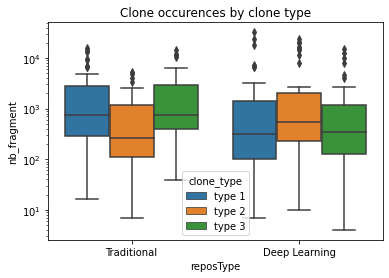

In [126]:
ml_trad_boxplot = sns.boxplot(x="reposType", y="nb_fragment", data=clone_by_type, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
plt.title('Clone occurences by clone type')

In [127]:
clone_by_type.to_csv('clone_type.csv', index=False)

In [163]:
dl_csharp_loc = pd.read_csv('../data/otherLanguages/dl_csharp_loc.csv')
trad_csharp_loc = pd.read_csv('../data/otherLanguages/trad_csharp_loc.csv')
dl_java_loc = pd.read_csv('../data/otherLanguages/dl_java_loc.csv')
trad_java_loc = pd.read_csv('../data/otherLanguages/trad_java_loc.csv')

In [164]:
dl_csharp_loc['language']='csharp'
trad_csharp_loc['language']='csharp'
dl_java_loc['language']='java'
trad_java_loc['language']='java'

In [165]:
dl_csharp_loc['reposType']='Deep Learning'
trad_csharp_loc['reposType']='Traditional'
dl_java_loc['reposType']='Deep Learning'
trad_java_loc['reposType']='Traditional'

In [166]:
dl_csharp_loc['repoName']=dl_csharp_loc['repo']
trad_csharp_loc['repoName']=trad_csharp_loc['repo']
dl_java_loc['repoName']=dl_java_loc['repo']

In [167]:
def get_repoName(row):
    repoPath = row['repoName_path']
    return repoPath.split('/')[-1]

In [168]:
trad_java_loc['repoName']= trad_java_loc.apply(get_repoName, axis=1)

In [160]:
trad_java_loc

,repoName_path,total_sloc,language,reposType,repoName
0,/tmpstore/bimus/b-repositories/trad/java/sprin...,699741,java,Traditional,spring-framework
1,/tmpstore/bimus/b-repositories/trad/java/frame...,437134,java,Traditional,framework
2,/tmpstore/bimus/b-repositories/trad/java/okhttp,37217,java,Traditional,okhttp
3,/tmpstore/bimus/b-repositories/trad/java/retrofit,26513,java,Traditional,retrofit
4,/tmpstore/bimus/b-repositories/trad/java/dubbo,174064,java,Traditional,dubbo
5,/tmpstore/bimus/b-repositories/trad/java/MPAnd...,25232,java,Traditional,MPAndroidChart


In [169]:
repos_size= pd.concat([dl_csharp_loc,trad_csharp_loc])
repos_size= pd.concat([repos_size,dl_java_loc])
repos_size= pd.concat([repos_size,trad_java_loc])

In [44]:
# get repos size info
#repos_size = pd.read_csv("data/slocs_data.csv")

In [170]:
repos_size

,language,repo,repoName,repoName_path,reposType,total_sloc
0,csharp,ConvNetSharp,ConvNetSharp,b-repositories/DL/csharp/ConvNetSharp,Deep Learning,16620
1,csharp,SiaNet,SiaNet,b-repositories/DL/csharp/SiaNet,Deep Learning,248467
2,csharp,KelpNet,KelpNet,b-repositories/DL/csharp/KelpNet,Deep Learning,21045
3,csharp,MyCaffe,MyCaffe,b-repositories/DL/csharp/MyCaffe,Deep Learning,180353
4,csharp,RNNSharp,RNNSharp,b-repositories/DL/csharp/RNNSharp,Deep Learning,6316
5,csharp,SharpNet,SharpNet,b-repositories/DL/csharp/SharpNet,Deep Learning,27593
6,csharp,TensorShader,TensorShader,b-repositories/DL/csharp/TensorShader,Deep Learning,149199
7,csharp,keras-sharp,keras-sharp,b-repositories/DL/csharp/keras-sharp,Deep Learning,10751
8,csharp,CeNiN,CeNiN,b-repositories/DL/csharp/CeNiN,Deep Learning,1438
9,csharp,Seq2SeqSharp,Seq2SeqSharp,b-repositories/DL/csharp/Seq2SeqSharp,Deep Learning,18088


In [171]:
repos_size.to_csv('../data/otherLanguages/repos_size_otherLanguage.csv', index=False)

In [172]:
repos_smells_size = pd.merge(clone_by_type,repos_size,how='left', on=['repoName', 'language', 'reposType'])

In [173]:
repos_smells_size = repos_smells_size[repos_smells_size['total_sloc'] !=0]

In [174]:
repos_smells_size['normalization_occs'] = repos_smells_size['nb_fragment']/repos_smells_size['total_sloc']

In [175]:
repos_smells_size.to_csv('../data/otherLanguages/repos_clones_normalized.csv', index=False)

Text(0.5, 1.0, 'Clone occurences by clone type')

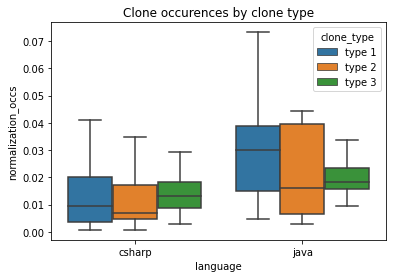

In [176]:
ml_trad_boxplot = sns.boxplot(x="language", y="normalization_occs", data=repos_smells_size,showfliers = False, hue="clone_type" )
#ml_trad_boxplot.set_yscale("log")
plt.title('Clone occurences by clone type')

In [177]:
repos_smells_size[repos_smells_size['reposType']=='Traditional']

,repoName,granularity,clone_type,language,reposType,nb_fragment,repo,repoName_path,total_sloc,normalization_occs
0,AspectCore-Framework,Block,type 1,csharp,Traditional,212,AspectCore-Framework,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.012243
1,AspectCore-Framework,Block,type 2,csharp,Traditional,150,AspectCore-Framework,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.008663
2,AspectCore-Framework,Block,type 3,csharp,Traditional,347,AspectCore-Framework,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.020039
3,AspectCore-Framework,Function,type 1,csharp,Traditional,48,AspectCore-Framework,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.002772
4,AspectCore-Framework,Function,type 2,csharp,Traditional,110,AspectCore-Framework,/tmpstore/bimus/b-repositories/trad/csharp/Asp...,17316,0.006353
...,...,...,...,...,...,...,...,...,...,...
226,spring-framework,Block,type 2,java,Traditional,4733,NaN,/tmpstore/bimus/b-repositories/trad/java/sprin...,699741,0.006764
227,spring-framework,Block,type 3,java,Traditional,11701,NaN,/tmpstore/bimus/b-repositories/trad/java/sprin...,699741,0.016722
228,spring-framework,Function,type 1,java,Traditional,9156,NaN,/tmpstore/bimus/b-repositories/trad/java/sprin...,699741,0.013085
229,spring-framework,Function,type 2,java,Traditional,3380,NaN,/tmpstore/bimus/b-repositories/trad/java/sprin...,699741,0.004830


In [178]:
dl = repos_smells_size[repos_smells_size['reposType']=='Deep Learning']
trad = repos_smells_size[repos_smells_size['reposType']=='Traditional']

In [179]:
dl_type1 = dl[dl['clone_type']=='type 1']
dl_type2 = dl[dl['clone_type']=='type 2']
dl_type3 = dl[dl['clone_type']=='type 3']

In [180]:
dl_type1.to_csv('../data/otherLanguages/dl_type1_otherLanguage.csv', index=False)
dl_type2.to_csv('../data/otherLanguages/dl_type2_otherLanguage.csv', index=False)
dl_type3.to_csv('../data/otherLanguages/dl_type3_otherLanguage.csv', index=False)

In [181]:
trad_type1 = trad[trad['clone_type']=='type 1']
trad_type2 = trad[trad['clone_type']=='type 2']
trad_type3 = trad[trad['clone_type']=='type 3']

In [182]:
trad_type1.to_csv('../data/otherLanguages/trad_type1_otherLanguage.csv', index=False)
trad_type2.to_csv('../data/otherLanguages/trad_type2_otherLanguage.csv', index=False)
trad_type3.to_csv('../data/otherLanguages/trad_type3_otherLanguage.csv', index=False)

In [52]:
stats.mannwhitneyu(type1.normalization_occs,type2.normalization_occs)

MannwhitneyuResult(statistic=4024.0, pvalue=0.34711109864882184)

In [53]:
stats.mannwhitneyu(type1.normalization_occs,type3.normalization_occs)

MannwhitneyuResult(statistic=2912.5, pvalue=2.6940186174008953e-10)

In [54]:
stats.mannwhitneyu(type2.normalization_occs,type3.normalization_occs)

MannwhitneyuResult(statistic=2616.0, pvalue=4.622561861761577e-09)

In [60]:
repos_smells_size_block = repos_smells_size[repos_smells_size['granularity']=='Block']
repos_smells_size_fct = repos_smells_size[repos_smells_size['granularity']=='Function']

In [61]:
stats.mannwhitneyu(repos_smells_size_block.normalization_occs,repos_smells_size_fct.normalization_occs)

MannwhitneyuResult(statistic=9572.0, pvalue=0.013104763673959017)

Text(0.5, 1.0, 'Clone occurences by granularity')

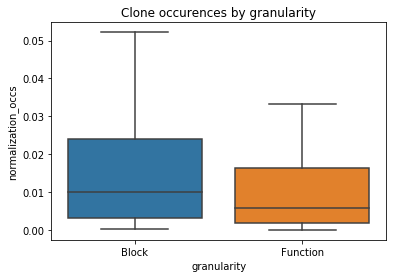

In [62]:
g = sns.boxplot(x="granularity", y="normalization_occs", data=repos_smells_size,showfliers = False )
#ml_trad_boxplot.set_yscale("log")
plt.title('Clone occurences by granularity')

In [63]:
type1_block = repos_smells_size_block[repos_smells_size_block['clone_type']=='type 1']
type2_block = repos_smells_size_block[repos_smells_size_block['clone_type']=='type 2']
type3_block = repos_smells_size_block[repos_smells_size_block['clone_type']=='type 3']

Text(0.5, 1.0, 'Clone occurences by clone type (blocks)')

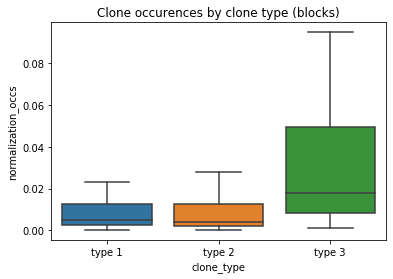

In [64]:
g = sns.boxplot(x="clone_type", y="normalization_occs", data=repos_smells_size_block,showfliers = False )
#ml_trad_boxplot.set_yscale("log")
plt.title('Clone occurences by clone type (blocks)')

In [66]:
stats.mannwhitneyu(type1_block.normalization_occs,type2_block.normalization_occs)

MannwhitneyuResult(statistic=921.0, pvalue=0.4510304897284301)

In [67]:
stats.mannwhitneyu(type1_block.normalization_occs,type3_block.normalization_occs)

MannwhitneyuResult(statistic=817.0, pvalue=1.7820243041590646e-05)

In [68]:
stats.mannwhitneyu(type2_block.normalization_occs,type3_block.normalization_occs)

MannwhitneyuResult(statistic=573.0, pvalue=0.0001263478997506811)

Text(0.5, 1.0, 'Clone occurences by clone type (fct)')

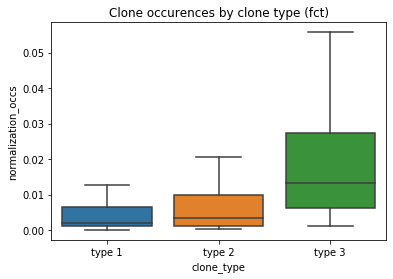

In [65]:
g = sns.boxplot(x="clone_type", y="normalization_occs", data=repos_smells_size_fct,showfliers = False )
#ml_trad_boxplot.set_yscale("log")
plt.title('Clone occurences by clone type (fct)')

In [69]:
type1_fct = repos_smells_size_fct[repos_smells_size_fct['clone_type']=='type 1']
type2_fct = repos_smells_size_fct[repos_smells_size_fct['clone_type']=='type 2']
type3_fct= repos_smells_size_fct[repos_smells_size_fct['clone_type']=='type 3']

In [70]:
stats.mannwhitneyu(type1_fct.normalization_occs,type2_fct.normalization_occs)

MannwhitneyuResult(statistic=1000.0, pvalue=0.1730848190656597)

In [71]:
stats.mannwhitneyu(type1_fct.normalization_occs,type3_fct.normalization_occs)

MannwhitneyuResult(statistic=588.5, pvalue=3.521875366131765e-07)

In [72]:
stats.mannwhitneyu(type2_fct.normalization_occs,type3_fct.normalization_occs)

MannwhitneyuResult(statistic=741.0, pvalue=6.9840568853851424e-06)

In [75]:
repos_smells_size

,repoName,granularity,clone_type,nb_fragment,Unnamed: 0,type,total_sloc,normalization_occs
0,BerryNet,Block,type 1,78,253.0,Deep-Learning,406.0,0.192118
1,BerryNet,Block,type 2,25,253.0,Deep-Learning,406.0,0.061576
2,BerryNet,Block,type 3,115,253.0,Deep-Learning,406.0,0.283251
3,BerryNet,Function,type 1,56,253.0,Deep-Learning,406.0,0.137931
4,BerryNet,Function,type 2,19,253.0,Deep-Learning,406.0,0.046798
...,...,...,...,...,...,...,...,...
295,tflearn,Function,type 3,167,105.0,Deep-Learning,7262.0,0.022996
296,waifu2x-chainer,Block,type 1,12,202.0,Deep-Learning,803.0,0.014944
297,waifu2x-chainer,Block,type 3,17,202.0,Deep-Learning,803.0,0.021171
298,waifu2x-chainer,Function,type 1,4,202.0,Deep-Learning,803.0,0.004981


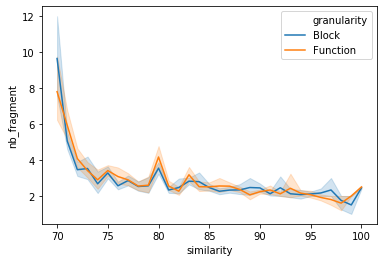

In [79]:
sns.lineplot(x="similarity", y="nb_fragment", hue="granularity", data=all_clone)

Text(0.5, 1.0, 'Clone Occurrences by project size dans les apps DL')

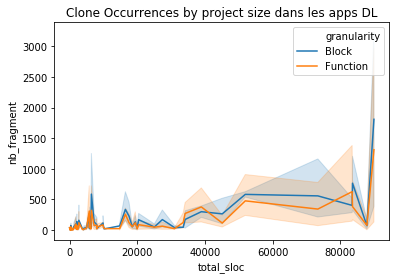

In [119]:
sns.lineplot(x="total_sloc", y="nb_fragment", hue="granularity", data=repos_smells_size)
plt.title('Clone Occurrences by project size dans les apps DL')

Text(0.5, 1.0, 'Clone Occurrences by project size dans les apps DL')

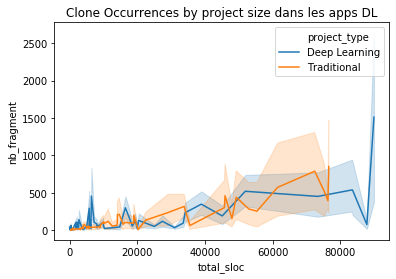

In [120]:
sns.lineplot(x="total_sloc", y="nb_fragment", hue="project_type", data=repos_clones_size)
plt.title('Clone Occurrences by project size dans les apps DL')

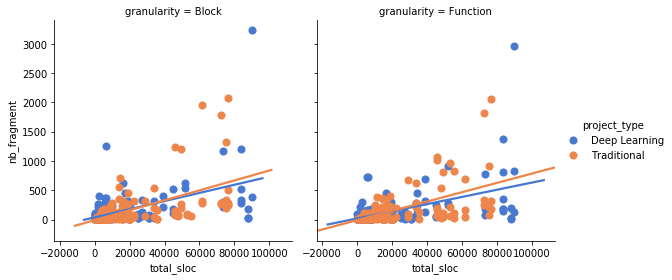

In [122]:
sns.lmplot(x="total_sloc", y="nb_fragment", col="granularity", hue="project_type", data=repos_clones_size,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [116]:
trad_size = repos_clones_size[repos_clones_size['project_type']=='Traditional']

Text(0.5, 1.0, 'Clone Occurrences by project size dans les apps Trad')

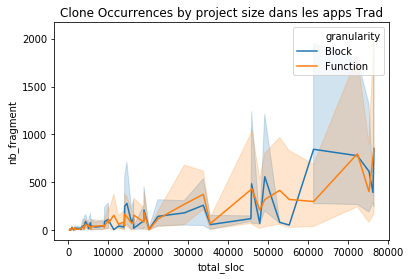

In [118]:
sns.lineplot(x="total_sloc", y="nb_fragment", hue="granularity", data=trad_size)
plt.title('Clone Occurrences by project size dans les apps Trad')

# Trad

In [82]:
trad_type2_by_class_clean= pd.read_csv('trad_type2_by_class_clean.csv')

In [83]:
trad_type2_by_class_clean['granularity'] = trad_type2_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [84]:
trad_type2_by_class_clean

,repoName,classid,g,similarity,files,startlines,endlines,nb_fragment,granularity
0,CommonMark,1,f,100,{'../clone_code/trad/CommonMark/test/normalize...,"{81, 84}","{83, 86}",2,Function
1,Dshell,4,f,100,{'../clone_code/trad/Dshell/decoders/filter/co...,"{72, 93}","{98, 77}",2,Function
2,Dshell,9,f,100,{'../clone_code/trad/Dshell/decoders/smb/smbfi...,"{60, 53}","{67, 60}",2,Function
3,Dshell,10,f,100,{'../clone_code/trad/Dshell/decoders/smb/smbfi...,"{81, 77}","{80, 84}",2,Function
4,Dshell,11,f,100,{'../clone_code/trad/Dshell/lib/dshell.py.pyin...,"{218, 187, 222}","{225, 221, 190}",3,Function
...,...,...,...,...,...,...,...,...,...
2200,yowsup,38,f,100,{'../clone_code/trad/yowsup/yowsup/layers/prot...,{27},{33},1,Function
2201,yowsup,39,f,100,{'../clone_code/trad/yowsup/yowsup/layers/prot...,{17},{20},1,Function
2202,yowsup,40,f,100,{'../clone_code/trad/yowsup/yowsup/layers/prot...,"{9, 13}","{12, 15}",2,Function
2203,yowsup,41,f,100,{'../clone_code/trad/yowsup/yowsup/layers/axol...,"{113, 99}","{112, 127}",2,Function


In [85]:
trad_type1_by_class_clean= pd.read_csv('trad_type1_by_class_clean.csv')
trad_type3_by_class_clean= pd.read_csv('trad_type3_by_class_clean.csv')
trad_type1_by_class_clean['granularity'] = trad_type1_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )
trad_type3_by_class_clean['granularity'] = trad_type3_by_class_clean.g.apply(lambda x:'Function' if x =='f' else 'Block' )

In [86]:
trad_type1_by_class_clean['clone_type']='type 1'
trad_type2_by_class_clean['clone_type']='type 2'
trad_type3_by_class_clean['clone_type']='type 3'

In [87]:
all_clone_trad = pd.concat([trad_type1_by_class_clean,trad_type2_by_class_clean])
all_clone_trad = pd.concat([all_clone_trad,trad_type3_by_class_clean])

In [88]:
all_clone['project_type']='Deep Learning'
all_clone_trad['project_type']='Traditional'

In [89]:
all_clones = pd.concat([all_clone,all_clone_trad])

In [91]:
clones_by_type = all_clones.groupby(['repoName','granularity','clone_type','project_type']).agg({'nb_fragment':'sum'}).reset_index()

In [92]:
repos_clones_size = pd.merge(clones_by_type,repos_size,how='left', on=['repoName'])

In [93]:
repos_clones_size = repos_clones_size[repos_clones_size['total_sloc'] !=0]

In [95]:
repos_clones_size['normalization_occs'] = repos_clones_size['nb_fragment']/repos_clones_size['total_sloc']

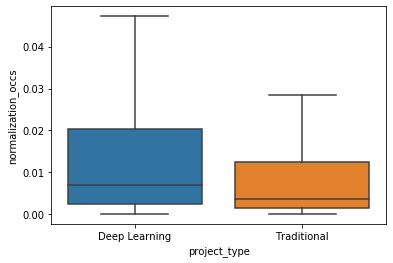

In [99]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="normalization_occs", data=repos_clones_size, showfliers=False)
#ml_trad_boxplot.set_yscale("log")

In [100]:
traditional = repos_clones_size[repos_clones_size['project_type']=='Traditional']
dl = repos_clones_size[repos_clones_size['project_type']=='Deep Learning']

In [101]:
stats.mannwhitneyu(traditional.normalization_occs,dl.normalization_occs)

MannwhitneyuResult(statistic=30575.0, pvalue=4.0667857093161396e-08)

type 1


MannwhitneyuResult(statistic=2060.0, pvalue=9.407295987908343e-09)

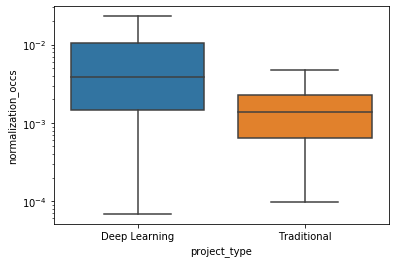

In [105]:
i = 0
clone_type = repos_clones_size['clone_type'].unique()[i]
print(clone_type)
smell_data=repos_clones_size[repos_clones_size['clone_type']==clone_type]
ml_trad_boxplot = sns.boxplot(x="project_type", y="normalization_occs", data=smell_data, showfliers = False)
ml_trad_boxplot.set_yscale("log")
dl_repos_smells = smell_data[smell_data['project_type']=='Traditional']
trad_repos_smells = smell_data[smell_data['project_type']=='Deep Learning']
stats.mannwhitneyu(dl_repos_smells.normalization_occs,trad_repos_smells.normalization_occs)

type 2


MannwhitneyuResult(statistic=2518.0, pvalue=0.0004728608726039026)

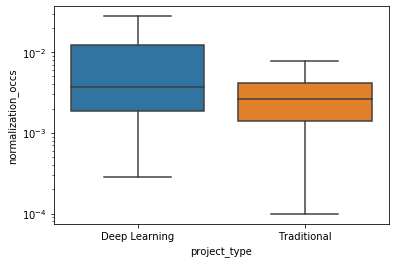

In [106]:
i = 1
clone_type = repos_clones_size['clone_type'].unique()[i]
print(clone_type)
smell_data=repos_clones_size[repos_clones_size['clone_type']==clone_type]
ml_trad_boxplot = sns.boxplot(x="project_type", y="normalization_occs", data=smell_data, showfliers = False)
ml_trad_boxplot.set_yscale("log")
dl_repos_smells = smell_data[smell_data['project_type']=='Traditional']
trad_repos_smells = smell_data[smell_data['project_type']=='Deep Learning']
stats.mannwhitneyu(dl_repos_smells.normalization_occs,trad_repos_smells.normalization_occs)

type 3


MannwhitneyuResult(statistic=5545.0, pvalue=0.04533332040566475)

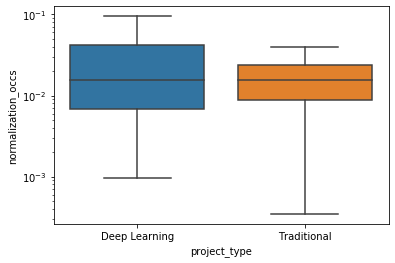

In [109]:
i = 2
clone_type = repos_clones_size['clone_type'].unique()[i]
print(clone_type)
smell_data=repos_clones_size[repos_clones_size['clone_type']==clone_type]
ml_trad_boxplot = sns.boxplot(x="project_type", y="normalization_occs", data=smell_data, showfliers = False)
ml_trad_boxplot.set_yscale("log")
dl_repos_smells = smell_data[smell_data['project_type']=='Traditional']
trad_repos_smells = smell_data[smell_data['project_type']=='Deep Learning']
stats.mannwhitneyu(dl_repos_smells.normalization_occs,trad_repos_smells.normalization_occs)

Text(0.5, 1.0, 'Clone occurrences by project type and by clone type')

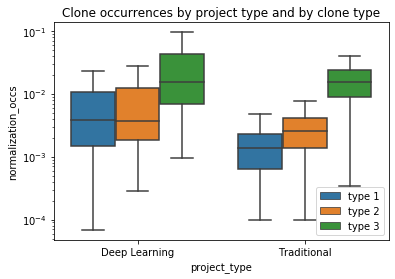

In [115]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="normalization_occs", data=repos_clones_size, showfliers=False, hue='clone_type')
ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best')
plt.title('Clone occurrences by project type and by clone type')